<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Cristopher Urbina H.
- Nombre de alumno 2: Joaquin Zamora O.

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/CrisU8/MDS7202-Primavera2024)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [222]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive

    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [223]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [224]:
energy_df = pd.read_csv('energia_homero.csv', parse_dates=['date'])
energy_df.head()

date  Energy_kWh
0 2016-06-01      29.691
1 2016-06-02      28.789
2 2016-06-03      19.247
3 2016-06-04      22.883
4 2016-06-05      25.195

In [225]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1498 non-null   datetime64[ns]
 1   Energy_kWh  1498 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.5 KB


In [226]:
energy_df.plot(x='date', y='Energy_kWh', figsize=(10, 6))

<Axes: xlabel='date'>

## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [227]:
# 0. Creando conjunto de entrenamiento y testeo

energy_df['date_int'] = energy_df['date'].apply(lambda x: x.toordinal())

energy_train = energy_df.loc[energy_df['date'] <= '2020-02-29']
energy_test = energy_df.loc[energy_df['date'] >= '2020-03-01']

print(f'Tamaño del conjunto de entrenamiento:{energy_train.shape}')
print(f'Tamaño del conjunto de testeo:{energy_test.shape}')

Tamaño del conjunto de entrenamiento:(1369, 3)
Tamaño del conjunto de testeo:(129, 3)


In [228]:
# 1. Pipeline para representar la tendencia de la serie de tiempo mediante un modelo lineal

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Pipeline_trend = Pipeline(
    [
        ('scaler', StandardScaler()),  # Para escalar valores de energia
        ('regressor', LinearRegression())  # Para obtener la representacion lineal de la serie de tiempo
    ]
)

MAE en train:10.57%
MAE en test:8.66%


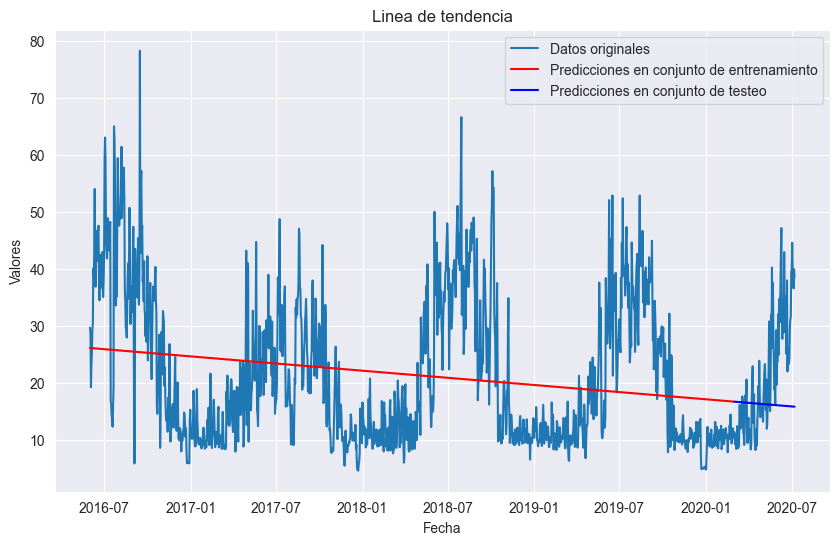

In [229]:
# 2. Entrenar al modelo para obtener la representacion lineal 
from sklearn.metrics import mean_absolute_error

Pipeline_trend.fit(energy_train[['date_int']], energy_train['Energy_kWh'])

train_predictions = Pipeline_trend.predict(energy_train[['date_int']])
test_predictions = Pipeline_trend.predict(energy_test[['date_int']])

# Mean absolute error
print(f"MAE en train:{mean_absolute_error(energy_train['Energy_kWh'], train_predictions):.2f}%")
print(f"MAE en test:{mean_absolute_error(energy_test['Energy_kWh'], test_predictions):.2f}%")

# Grafico

plt.figure(figsize=(10, 6))
plt.plot(energy_df['date'], energy_df['Energy_kWh'], label='Datos originales')
plt.plot(energy_df.loc[energy_train.index, 'date'], train_predictions, color='red',
         label='Predicciones en conjunto de entrenamiento')
plt.plot(energy_df.loc[energy_test.index, 'date'], test_predictions, color='blue',
         label='Predicciones en conjunto de testeo')
plt.xlabel('Fecha')
plt.ylabel('Valores')
plt.title('Linea de tendencia')
plt.legend()
plt.show()

In [230]:
# Grafico del error
predictions = np.concatenate((train_predictions, test_predictions))

print(f"Tamaño predicciones concatenadas:{predictions.shape}")
print(f"Tamaño valores reales: {energy_df.Energy_kWh.shape}")

# Calcular el error (diferencia entre los valores reales y las predicciones)
error_lineal = energy_df['Energy_kWh'] - predictions

# Graficar el error
plt.figure(figsize=(10, 6))
plt.plot(error_lineal, label="Error")
plt.title("Error entre valores reales y predicciones (Modelo lineal)")
plt.xlabel("Índice")
plt.ylabel("Error (kWh)")
plt.legend()
plt.show()

Tamaño predicciones concatenadas:(1498,)
Tamaño valores reales: (1498,)


>Se observa un claro patron estacional en la serie de tiempo, donde se puede apreciar que el error se mantiene en un rango de -20 a 50 kWh, lo que indica que el modelo lineal no es capaz de capturar la estacionalidad por si solo.

In [231]:
# Transformada de fourier

tf = np.abs(np.fft.rfft(energy_df['Energy_kWh'], len(energy_df['Energy_kWh'])))
muestras_hora = 1 / 24

In [232]:
frecs = np.fft.rfftfreq(len(energy_df), d=1. / muestras_hora)

In [233]:
import plotly.express as px

fig = px.line(x=frecs, y=tf, log_x=True)
fig.update_layout(xaxis_title=f'Frecuencia diaria')
fig.show()

> Se observa un peak en la frecuencia 111.2595e-6, lo que indica que la serie de tiempo tiene un comportamiento estacional marcado en un periodo de 365 días.

In [234]:
frec1 = 111.2595e-6

# Imprimir la frecuencia en términos de horas, días y años
print(f'La frecuencia {frec1} ciclos/día equivale a {1 / frec1} horas por ciclo')
print(f'La frecuencia {frec1} ciclos/día equivale a {(1 / frec1) / 24} días por ciclo')
print(f'La frecuencia {frec1} ciclos/día equivale a {(1 / frec1) / 24 / 365} años por ciclo')

La frecuencia 0.0001112595 ciclos/día equivale a 8987.99653063334 horas por ciclo
La frecuencia 0.0001112595 ciclos/día equivale a 374.4998554430558 días por ciclo
La frecuencia 0.0001112595 ciclos/día equivale a 1.0260270012138515 años por ciclo


In [235]:
from sklearn.base import BaseEstimator, TransformerMixin


# Clase para generar términos de Fourier
class FourierFeaturizer(BaseEstimator, TransformerMixin):
    def __init__(self, P, n):
        self.P = P  # Periodo
        self.n = n  # Número de términos de Fourier

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = np.asarray(X).reshape(-1, 1)  # Asegurarse de que sea un array 2D
        t = np.arange(len(X))  # Suponiendo que cada fila es un timestamp
        features = []

        # Agregar senos y cosenos de los términos de Fourier
        for i in range(1, self.n + 1):
            features.append(np.sin(2 * np.pi * i * t / self.P))
            features.append(np.cos(2 * np.pi * i * t / self.P))

        return np.column_stack(features)

In [236]:
# 4.  Pipeline seasonal


P = 365  # Periodo 
n = 3  # Número de términos de Fourier

# Crear el pipeline
Pipeline_seasonal = Pipeline([
    ('fourier', FourierFeaturizer(P=P, n=n)),  # Términos de Fourier
    ('linear_regression', LinearRegression())  # Regresión lineal
])


In [237]:
X = np.arange(len(energy_df))  # Indices de tiempo
y = energy_df['Energy_kWh'].values  # Valores de la variable objetivo

# Entrenar el pipeline
Pipeline_seasonal.fit(X, y)

# Hacer predicciones
predictions = Pipeline_seasonal.predict(X)


In [238]:
sns.lineplot(predictions)

<Axes: >

In [239]:
# 5. Se entrena el modelo con componente estacional y se obtienen las predicciones

Pipeline_seasonal.fit(energy_train[['date_int']], energy_train['Energy_kWh'])

train_predictions = Pipeline_seasonal.predict(energy_train[['date_int']])
test_predictions = Pipeline_seasonal.predict(energy_test[['date_int']])

# Mean absolute error
print(f"MAE en train:{mean_absolute_error(energy_train['Energy_kWh'], train_predictions):.2f}%")
print(f"MAE en test:{mean_absolute_error(energy_test['Energy_kWh'], test_predictions):.2f}%")

# Grafico

plt.figure(figsize=(10, 6))
plt.plot(energy_df['date'], energy_df['Energy_kWh'], label='Datos originales')
plt.plot(energy_df.loc[energy_train.index, 'date'], train_predictions, color='red',
         label='Predicciones en conjunto de entrenamiento')
plt.plot(energy_df.loc[energy_test.index, 'date'], test_predictions, color='blue',
         label='Predicciones en conjunto de testeo')
plt.xlabel('Fecha')
plt.ylabel('Valores')
plt.title('Linea de tendencia')
plt.legend()
plt.show()

MAE en train:5.41%
MAE en test:14.84%


> Se observa que las nuevas predicciones son capaces de seguir el patron claramente estacional de la serie  de tiempo obteniendo un MAE menor en el conjunto de entrenamiento en comparacion con el modelo lineal. No obstante generaliza de peor manera, en cuanto a MAE se refiere.

Tamaño predicciones concatenadas:(1498,)


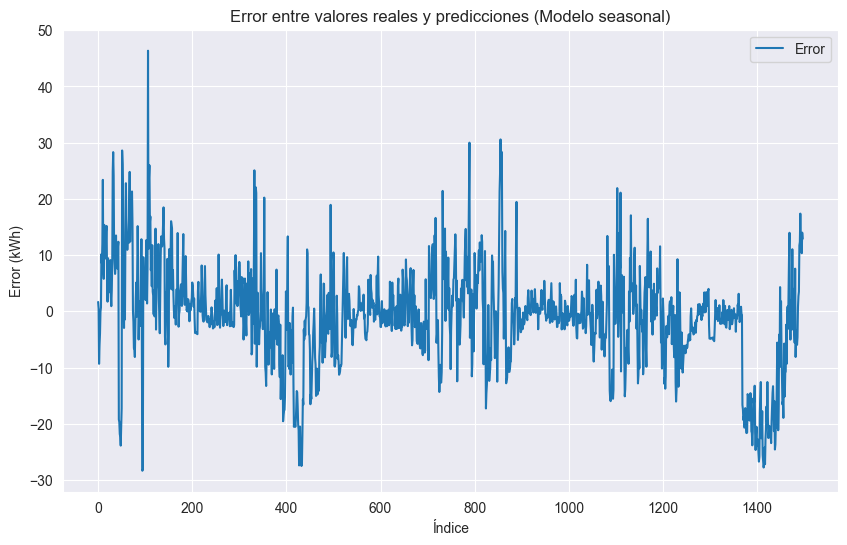

In [240]:
# Grafico del error

predictions = np.concatenate((train_predictions, test_predictions))

print(f"Tamaño predicciones concatenadas:{predictions.shape}")

# Calcular el error (diferencia entre los valores reales y las predicciones)
error_seasonal = energy_df['Energy_kWh'] - predictions

# Graficar el error
plt.figure(figsize=(10, 6))
plt.plot(error_seasonal, label="Error")
plt.title("Error entre valores reales y predicciones (Modelo seasonal)")
plt.xlabel("Índice")
plt.ylabel("Error (kWh)")
plt.legend()
plt.show()

> Se observa un error mucho mas normalizado en comparacion con el modelo lineal, lo que indica que el modelo seasonal es capaz de capturar la estacionalidad de la serie de tiempo. No de la mejor manera, pero se puede observar el aplanado en el error.

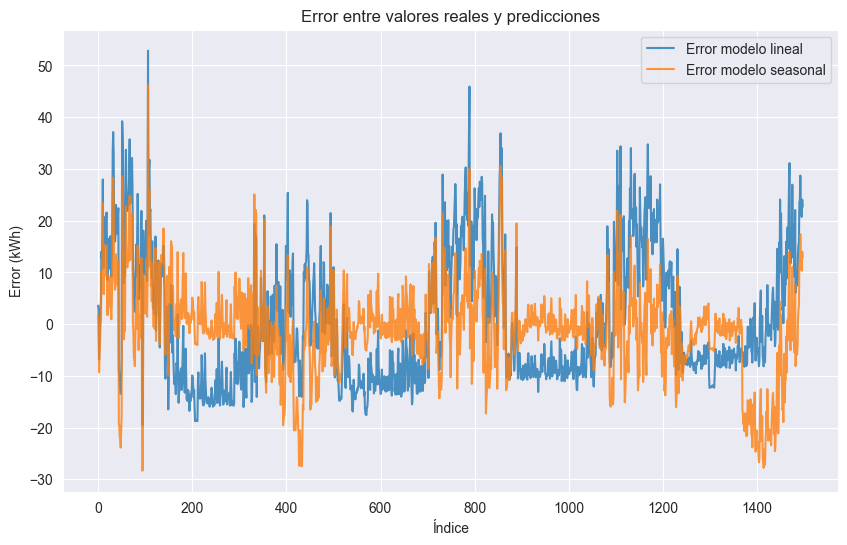

In [241]:
# 6. Comparaciòn visual

plt.figure(figsize=(10, 6))
plt.plot(error_lineal, label="Error modelo lineal", alpha=0.8)
plt.plot(error_seasonal, label="Error modelo seasonal", alpha=0.8)
plt.title("Error entre valores reales y predicciones")
plt.xlabel("Índice")
plt.ylabel("Error (kWh)")
plt.legend()
plt.show()

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [242]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**Respuesta:**

In [243]:
# 1. Adaptaciòn dataset para prophet

energy_train = energy_train.drop('date_int', axis=1).rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
energy_test = energy_test.drop('date_int', axis=1).rename(columns={'date': 'ds', 'Energy_kWh': 'y'})

print("Conjunto de entrenamiento:\n")
display(energy_train.head())
print("\nConjunto de testeo:\n")
display(energy_test.head())

Conjunto de entrenamiento:



ds       y
0 2016-06-01  29.691
1 2016-06-02  28.789
2 2016-06-03  19.247
3 2016-06-04  22.883
4 2016-06-05  25.195


Conjunto de testeo:



ds       y
1369 2020-03-01  11.372
1370 2020-03-02  10.883
1371 2020-03-03   9.233
1372 2020-03-04  10.178
1373 2020-03-05   8.434

In [244]:
# 2. Crear y ajustar el modelo Prophet
model = Prophet()
model.fit(energy_train)

14:58:12 - cmdstanpy - INFO - Chain [1] start processing
14:58:13 - cmdstanpy - INFO - Chain [1] done processing


In [245]:
future_dates = pd.DataFrame(energy_test['ds'])

# Generar las predicciones para el conjunto de prueba
forecast = model.predict(future_dates)

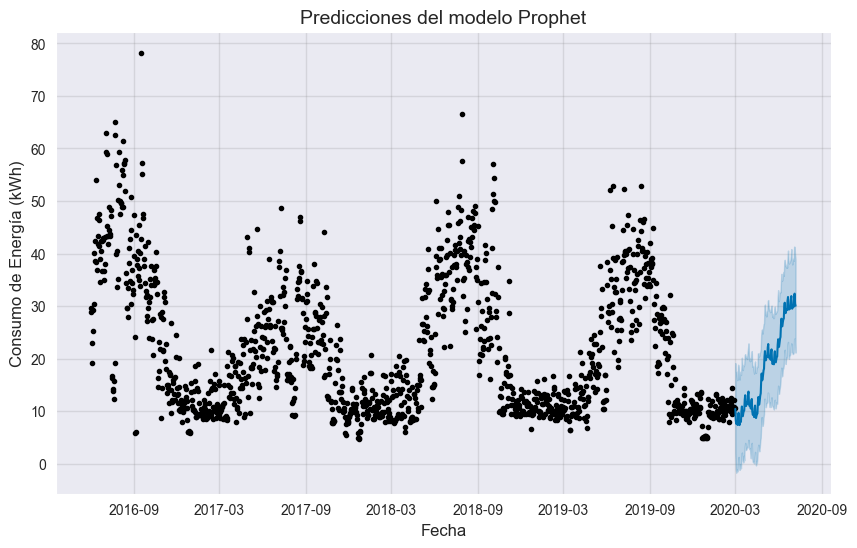

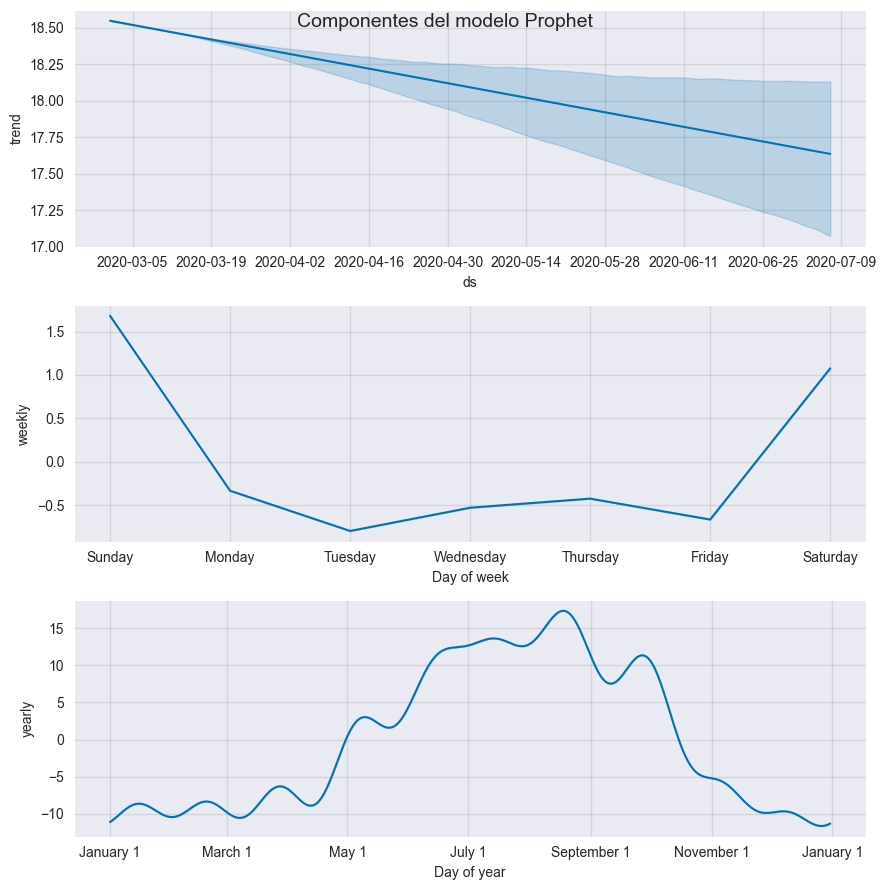

In [246]:
# 3. Graficar las predicciones y las componentes del modelo Prophet
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(forecast, ax=ax)
ax.set_title('Predicciones del modelo Prophet', fontsize=14)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Consumo de Energía (kWh)', fontsize=12)
plt.show()
print('\n')
# Componentes del modelo Prophet (Tendencia, Estacionalidad, etc.)
fig_components = model.plot_components(forecast)
fig_components.suptitle('Componentes del modelo Prophet', fontsize=14)
plt.show()

In [247]:
# 4. Calcular el MAE en el conjunto de prueba y entrenamiento

mae_train = mean_absolute_error(energy_train['y'], model.predict(energy_train)['yhat'])
mae_test = mean_absolute_error(energy_test['y'], forecast['yhat'])
print(f'MAE en el conjunto de prueba: {mae_test:.2f}%')
print(f'MAE en el conjunto de entrenamiento: {mae_train:.2f}%')

MAE en el conjunto de prueba: 4.95%
MAE en el conjunto de entrenamiento: 4.82%


> Se observa un MAE menor en el conjunto de entrenamiento en comparacion con el modelo lineal y seasonal, lo que indica que Prophet es capaz de capturar de mucho mejor manera cada componente de la serie de tiempo.

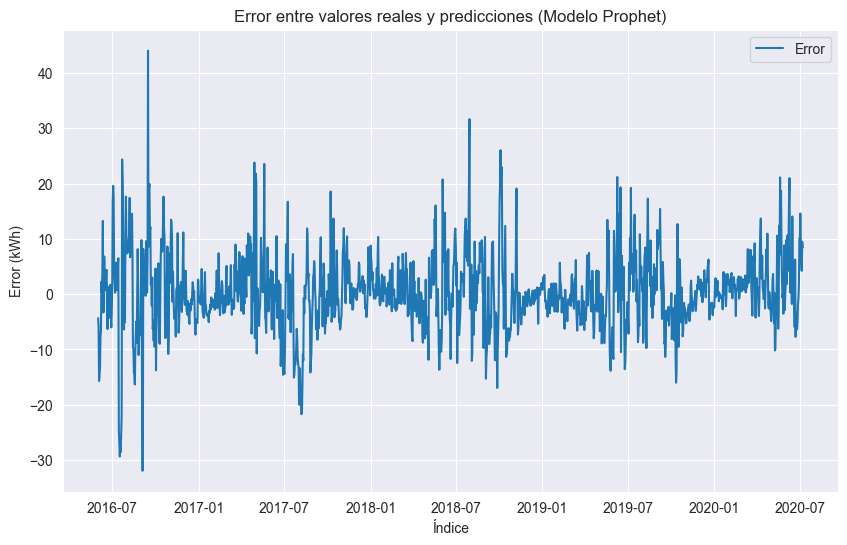

In [248]:
# 5. Graficar el error  

energy_df = energy_df.drop('date_int', axis=1).rename(columns={'date': 'ds', 'Energy_kWh': 'y'})

# Calcular el error (diferencia entre los valores reales y las predicciones)
error_prophet = energy_df['y'] - model.predict(energy_df)['yhat']

# Graficar el error
plt.figure(figsize=(10, 6))
plt.plot(energy_df.ds,error_prophet, label="Error")
plt.title("Error entre valores reales y predicciones (Modelo Prophet)")
plt.xlabel("Índice")
plt.ylabel("Error (kWh)")
plt.legend()
plt.show()

>Se observa un error mucho mas normal en relacion a los modelos lineales y basados en Fourier. Esto indica que Prophet es capaz de capturar la estacionalidad de la serie de tiempo de mejor manera. Luego, con los componentes del modelo graficados anteriormente mas este grafico de error, mas la forma de la serie misma, claramente existe y se observa un patron estacional alrededor de Julio de cada año.

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

In [249]:
# 0. Seleccionar las variables exógenas a utilizar del archivo datos_frink.csv

datos_frink = pd.read_csv('datos_frink.csv', parse_dates=['date'])
datos_frink.head()

date  Temp_max  Temp_avg  Temp_min  Dew_max  Dew_avg  Dew_min  \
0 2016-06-01        85      74.8        68       74     71.4       66   
1 2016-06-02        76      71.2        66       74     70.3       66   
2 2016-06-03        79      72.1        68       72     70.0       68   
3 2016-06-04        76      71.2        69       73     70.0       66   
4 2016-06-05        82      73.8        68       72     70.0       68   

   Hum_max  Hum_avg  Hum_min  Wind_max  Wind_avg  Wind_min  Press_max  \
0      100     89.4       65        21       9.5         0       29.8   
1      100     96.8       89        18       7.8         0       29.8   
2      100     93.6       72        18       4.7         0       29.8   
3      100     96.1       85        20       7.0         0       29.8   
4      100     88.7       62        17       7.7         0       29.7   

   Press_avg  Press_min  
0       29.8       29.7  
1       29.8       29.7  
2       29.8       29.7  
3       29.7       29.7  
4       29.7       29.7

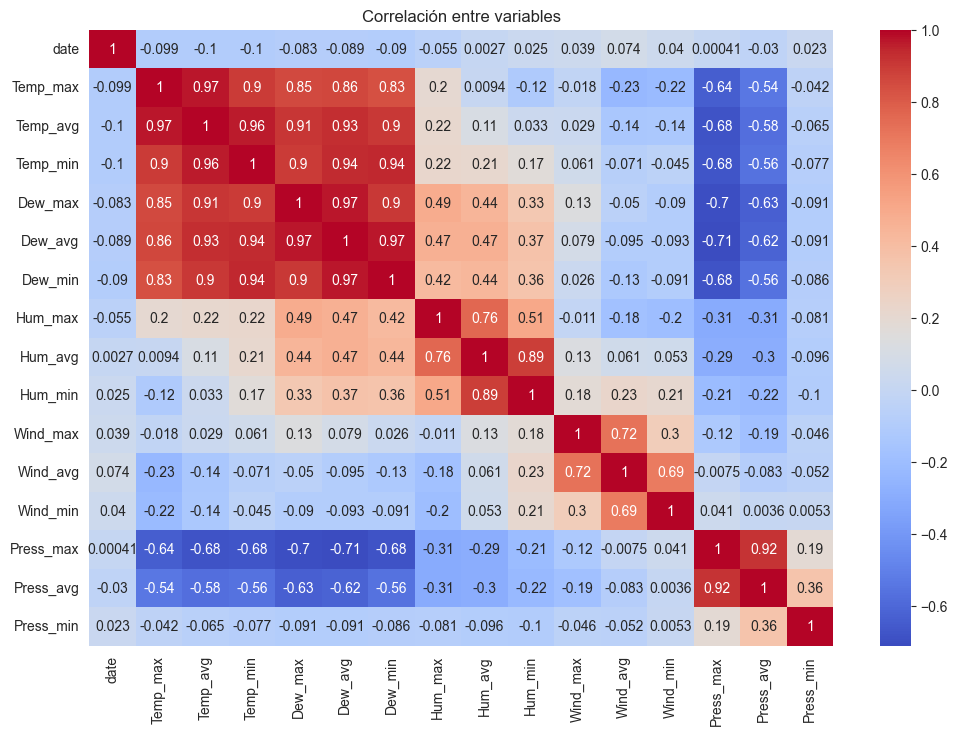

In [250]:
# Correlacion entre variables
corr = datos_frink.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()

In [251]:
# Selección de las columnas necesarias
datos_frink_subset = datos_frink[['date', 'Temp_avg', 'Hum_avg', 'Hum_min', 'Hum_max', 'Press_avg', 'Press_min']]

# Hacemos el merge correctamente. Aquí se asume que 'date' en datos_frink_subset y 'ds' en energy_train son las columnas equivalentes
energy_train = energy_train.merge(datos_frink_subset, left_on='ds', right_on='date', how='left')
energy_test = energy_test.merge(datos_frink_subset, left_on='ds', right_on='date', how='left')

# Mostramos el tamaño y las primeras filas de los conjuntos de datos resultantes
print(f"Conjunto de entrenamiento: {energy_train.shape}\n")
display(energy_train.head())

print(f"\nConjunto de testeo: {energy_test.shape}\n")
display(energy_test.head())

Conjunto de entrenamiento: (1369, 9)



ds       y       date  Temp_avg  Hum_avg  Hum_min  Hum_max  \
0 2016-06-01  29.691 2016-06-01      74.8     89.4       65      100   
1 2016-06-02  28.789 2016-06-02      71.2     96.8       89      100   
2 2016-06-03  19.247 2016-06-03      72.1     93.6       72      100   
3 2016-06-04  22.883 2016-06-04      71.2     96.1       85      100   
4 2016-06-05  25.195 2016-06-05      73.8     88.7       62      100   

   Press_avg  Press_min  
0       29.8       29.7  
1       29.8       29.7  
2       29.8       29.7  
3       29.7       29.7  
4       29.7       29.7


Conjunto de testeo: (129, 9)



ds       y       date  Temp_avg  Hum_avg  Hum_min  Hum_max  \
0 2020-03-01  11.372 2020-03-01      67.1     77.5       65       90   
1 2020-03-02  10.883 2020-03-02      70.8     80.4       56       93   
2 2020-03-03   9.233 2020-03-03      72.6     82.2       54       93   
3 2020-03-04  10.178 2020-03-04      67.4     86.0       69       97   
4 2020-03-05   8.434 2020-03-05      62.0     56.1       29       77   

   Press_avg  Press_min  
0       29.9       29.8  
1       29.7       29.6  
2       29.7       29.6  
3       29.6       29.6  
4       30.1       29.9

In [252]:
# 1. Crear y ajustar el modelo Prophet con regresores

model = Prophet()
for col in datos_frink_subset.columns[1:]:
    model.add_regressor(col)
    print("Agregando regresor:", col)

model.fit(energy_train)

Agregando regresor: Temp_avg
Agregando regresor: Hum_avg
Agregando regresor: Hum_min
Agregando regresor: Hum_max
Agregando regresor: Press_avg
Agregando regresor: Press_min


14:58:24 - cmdstanpy - INFO - Chain [1] start processing
14:58:24 - cmdstanpy - INFO - Chain [1] done processing


In [253]:
# 2. Graficar las predicciones y las componentes del modelo Prophet

future_dates = pd.DataFrame(energy_test[['ds', 'Temp_avg', 'Hum_avg', 'Hum_min', 'Hum_max', 'Press_avg', 'Press_min']])

# Generar las predicciones para el conjunto de prueba
forecast = model.predict(future_dates)

# Graficar las predicciones y las componentes del modelo Prophet
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(forecast, ax=ax)
ax.set_title('Predicciones del modelo Prophet con regresores', fontsize=14)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Consumo de Energía (kWh)', fontsize=12)
plt.show()

# Componentes del modelo Prophet (Tendencia, Estacionalidad, etc.)
fig_components = model.plot_components(forecast)
fig_components.suptitle('Componentes del modelo Prophet con regresores', fontsize=14)
plt.show()

In [254]:
# 3. Calcular el MAE en el conjunto de prueba y entrenamiento

mae_train = mean_absolute_error(energy_train['y'], model.predict(energy_train)['yhat'])
mae_test = mean_absolute_error(energy_test['y'], forecast['yhat'])

print(f'MAE en el conjunto de prueba: {mae_test:.2f}%')
print(f'MAE en el conjunto de entrenamiento: {mae_train:.2f}%')

MAE en el conjunto de prueba: 4.53%
MAE en el conjunto de entrenamiento: 4.71%


> Se observa un MAE menor en el conjunto de entrenamiento y testeo en comparacion con el modelo Prophet sin regresores, lo que indica que la inclusion de variables exogenas es capaz de mejorar el desempeño del modelo.

In [255]:
# 4. Graficar el error

energy_df = energy_df.merge(datos_frink_subset, left_on='ds', right_on='date', how='left')

error_prophet_con_regresores = energy_df['y'] - model.predict(energy_df)['yhat']

# Graficar el error
plt.figure(figsize=(10, 6))
plt.plot(error_prophet_con_regresores, label="Error")
plt.title("Error entre valores reales y predicciones (Modelo Prophet con regresores)")
plt.xlabel("Índice")
plt.ylabel("Error (kWh)")
plt.legend()
plt.show()

> Se observa un error mucho mas normalizado en comparacion con el modelo Prophet sin regresores, lo que indica que la inclusion de variables exogenas es capaz de capturar de mejor manera la estacionalidad de la serie de tiempo.

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

<Figure size 1000x600 with 0 Axes>

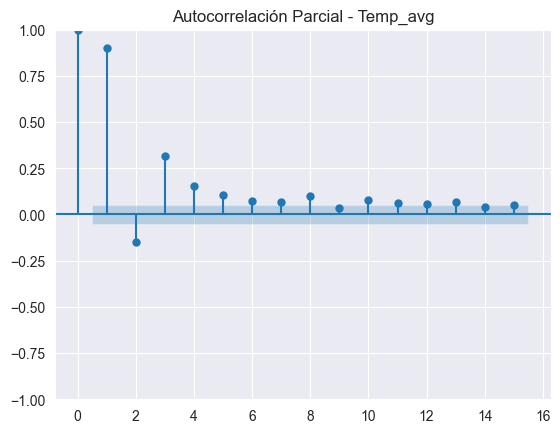

<Figure size 1000x600 with 0 Axes>

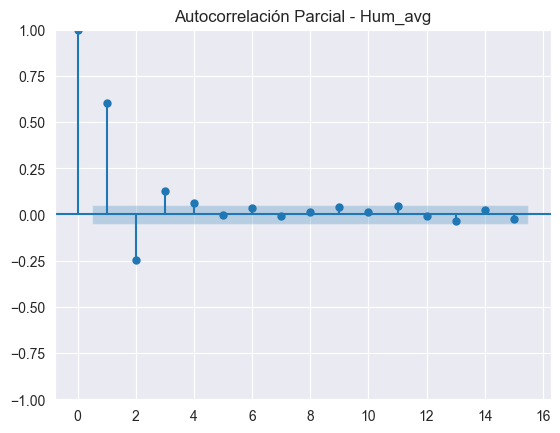

<Figure size 1000x600 with 0 Axes>

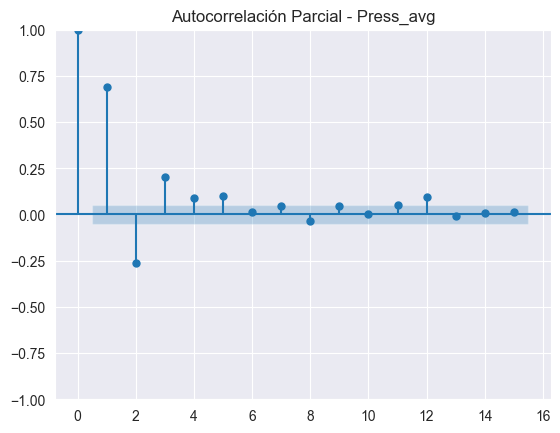

In [256]:
# 1. Calcular la Autocorrelación Parcial de las variables exógenas avg
from statsmodels.graphics.tsaplots import plot_pacf

# Selección de las variables exógenas
exogenous_vars = ['Temp_avg', 'Hum_avg', 'Press_avg']  # Ajustar según las variables disponibles

# Definir la cantidad de rezagos máximos que se quieren evaluar
max_lags = 15

# Calcular y graficar la PACF para cada variable exógena
for var in exogenous_vars:
    plt.figure(figsize=(10, 6))
    plot_pacf(energy_train[var].dropna(), lags=max_lags, method='ywm', title=f'PACF - {var}')
    plt.title(f'Autocorrelación Parcial - {var}')
    plt.show()




> Con 5 rezagos parece ser sufienciente para capturar la autocorrelacion de las variables exogenas seleccionadas, ya que mas alla de este valor, la autocorrelacion se mantiene en valores cercanos a 0. Por lo que, se considera que 5 es un valor adecuado para la cantidad de lags a aplicar.

In [270]:
# 2. Aplicar los lags determinados a las variables exógenas
def create_lags(df, column, lags):
    """
    Función para crear lags de una columna específica.
    
    df: DataFrame
    column: columna de la que se quieren crear los lags
    lags: cantidad de rezagos (lags)
    """
    for lag in range(1, lags + 1):
        df[f'{column}_lag{lag}'] = df[column].shift(lag)
    return df

# Selección de las variables exógenas de las cuales vamos a crear lags
exogenous_vars = ['Temp_avg', 'Hum_avg', 'Press_avg']  # Ajusta según las variables exógenas disponibles

# Crear los rezagos (lags) para cada variable en los conjuntos de entrenamiento y prueba
lags = 5  # Número de lags determinados

# Aplicar los lags a las variables exógenas en el conjunto de entrenamiento
for var in exogenous_vars:
    energy_train = create_lags(energy_train, var, lags)

# Aplicar los lags a las variables exógenas en el conjunto de prueba
for var in exogenous_vars:
    energy_test = create_lags(energy_test, var, lags)

# 3. Inputar valores nulos con la media de cada variable
# Definir las columnas y sus lags correspondientes
variables = {
    'Temp': ['Temp_avg', 'Temp_avg_lag1', 'Temp_avg_lag2', 'Temp_avg_lag3', 'Temp_avg_lag4', 'Temp_avg_lag5'],
    'Press': ['Press_avg', 'Press_avg_lag1', 'Press_avg_lag2', 'Press_avg_lag3', 'Press_avg_lag4', 'Press_avg_lag5'],
    'Hum': ['Hum_avg', 'Hum_avg_lag1', 'Hum_avg_lag2', 'Hum_avg_lag3', 'Hum_avg_lag4', 'Hum_avg_lag5']
}

# Función para imputar valores nulos con la media de la variable original
def imputar_nulos_por_media(df, var):
    # Imputar los lags correspondientes
    for lag in range(1, 6):  # Para lags de 1 a 5
        lag_col = f'{var}_avg_lag{lag}'
        avg_col = f'{var}_avg'
        
        # Calcular la media de la columna original (Temp_avg, Press_avg, Hum_avg)
        media_valor = df[avg_col].mean()
        
        # Imputar valores nulos en la columna de lag
        df[lag_col].fillna(media_valor, inplace=True)

# Aplicar la función a cada variable
for var in variables.keys():
    imputar_nulos_por_media(energy_train, var)
    imputar_nulos_por_media(energy_test, var)

# Verificar que no haya más valores nulos
print(f"Número de NaN en el conjunto de entrenamiento después de la imputación:\n{energy_train.isna().sum()}")
print(f"Número de NaN en el conjunto de prueba después de la imputación:\n{energy_test.isna().sum()}")

print(f"Conjunto de entrenamiento con lags: {energy_train.shape}")
display(energy_train[['Temp_avg','Temp_avg_lag1','Temp_avg_lag2','Temp_avg_lag3','Temp_avg_lag4','Temp_avg_lag5']].head())

print(f"\nConjunto de test con lags: {energy_test.shape}")
display(energy_test[['Hum_avg','Hum_avg_lag1','Hum_avg_lag2','Hum_avg_lag3','Hum_avg_lag4','Hum_avg_lag5']].head())

Número de NaN en el conjunto de entrenamiento después de la imputación:
ds                0
y                 0
date              0
Temp_avg          0
Hum_avg           0
Hum_min           0
Hum_max           0
Press_avg         0
Press_min         0
Temp_avg_lag1     0
Temp_avg_lag2     0
Temp_avg_lag3     0
Temp_avg_lag4     0
Temp_avg_lag5     0
Hum_avg_lag1      0
Hum_avg_lag2      0
Hum_avg_lag3      0
Hum_avg_lag4      0
Hum_avg_lag5      0
Press_avg_lag1    0
Press_avg_lag2    0
Press_avg_lag3    0
Press_avg_lag4    0
Press_avg_lag5    0
dtype: int64
Número de NaN en el conjunto de prueba después de la imputación:
ds                0
y                 0
date              0
Temp_avg          0
Hum_avg           0
Hum_min           0
Hum_max           0
Press_avg         0
Press_min         0
Temp_avg_lag1     0
Temp_avg_lag2     0
Temp_avg_lag3     0
Temp_avg_lag4     0
Temp_avg_lag5     0
Hum_avg_lag1      0
Hum_avg_lag2      0
Hum_avg_lag3      0
Hum_avg_lag4      0
Hum_avg_la

/var/folders/5y/kxfmyrls109gkh8gnfsh6myw0000gn/T/ipykernel_7623/2102217536.py:47: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Temp_avg  Temp_avg_lag1  Temp_avg_lag2  Temp_avg_lag3  Temp_avg_lag4  \
5      76.6      70.884897      70.884897      70.884897      70.884897   
6      79.6      76.600000      70.884897      70.884897      70.884897   
7      79.3      79.600000      76.600000      70.884897      70.884897   
8      79.2      79.300000      79.600000      76.600000      70.884897   
9      80.6      79.200000      79.300000      79.600000      76.600000   

   Temp_avg_lag5  
5      70.884897  
6      70.884897  
7      70.884897  
8      70.884897  
9      70.884897


Conjunto de test con lags: (124, 24)


Hum_avg  Hum_avg_lag1  Hum_avg_lag2  Hum_avg_lag3  Hum_avg_lag4  \
5     36.6     71.393548     71.393548     71.393548     71.393548   
6     59.7     36.600000     71.393548     71.393548     71.393548   
7     72.9     59.700000     36.600000     71.393548     71.393548   
8     79.7     72.900000     59.700000     36.600000     71.393548   
9     84.6     79.700000     72.900000     59.700000     36.600000   

   Hum_avg_lag5  
5     71.393548  
6     71.393548  
7     71.393548  
8     71.393548  
9     71.393548

In [274]:
# 4. Crear y entrenar el modelo Prophet con regresores y lags

model_lags = Prophet()
for var in exogenous_vars:
    model_lags.add_regressor(var)
    print("Agregando regresor:", var)
    for lag in range(1, lags + 1):
        model_lags.add_regressor(f'{var}_lag{lag}')
        print("Agregando regresor:", f'{var}_lag{lag}')

model_lags.fit(energy_train)

Agregando regresor: Temp_avg
Agregando regresor: Temp_avg_lag1
Agregando regresor: Temp_avg_lag2
Agregando regresor: Temp_avg_lag3
Agregando regresor: Temp_avg_lag4
Agregando regresor: Temp_avg_lag5
Agregando regresor: Hum_avg
Agregando regresor: Hum_avg_lag1
Agregando regresor: Hum_avg_lag2
Agregando regresor: Hum_avg_lag3
Agregando regresor: Hum_avg_lag4
Agregando regresor: Hum_avg_lag5
Agregando regresor: Press_avg
Agregando regresor: Press_avg_lag1
Agregando regresor: Press_avg_lag2
Agregando regresor: Press_avg_lag3
Agregando regresor: Press_avg_lag4
Agregando regresor: Press_avg_lag5


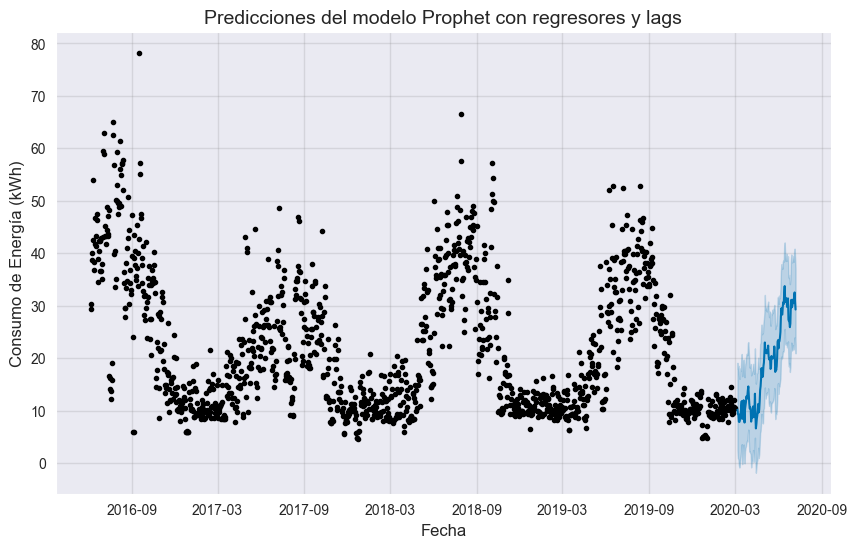

In [275]:
# 5. Graficar las predicciones y las componentes del modelo Prophet con regresores y lags

future_dates = pd.DataFrame(energy_test[['ds', 'Temp_avg', 'Temp_avg_lag1', 'Temp_avg_lag2', 'Temp_avg_lag3', 'Temp_avg_lag4', 'Temp_avg_lag5',
                                         'Hum_avg', 'Hum_avg_lag1', 'Hum_avg_lag2', 'Hum_avg_lag3', 'Hum_avg_lag4', 'Hum_avg_lag5',
                                         'Press_avg', 'Press_avg_lag1', 'Press_avg_lag2', 'Press_avg_lag3', 'Press_avg_lag4', 'Press_avg_lag5']])
# Generar las predicciones para el conjunto de prueba
forecast_lags = model_lags.predict(future_dates)

# Graficar las predicciones y las componentes del modelo Prophet con regresores y lags
fig, ax = plt.subplots(figsize=(10, 6))
model_lags.plot(forecast_lags, ax=ax)
ax.set_title('Predicciones del modelo Prophet con regresores y lags', fontsize=14)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Consumo de Energía (kWh)', fontsize=12)
plt.show()

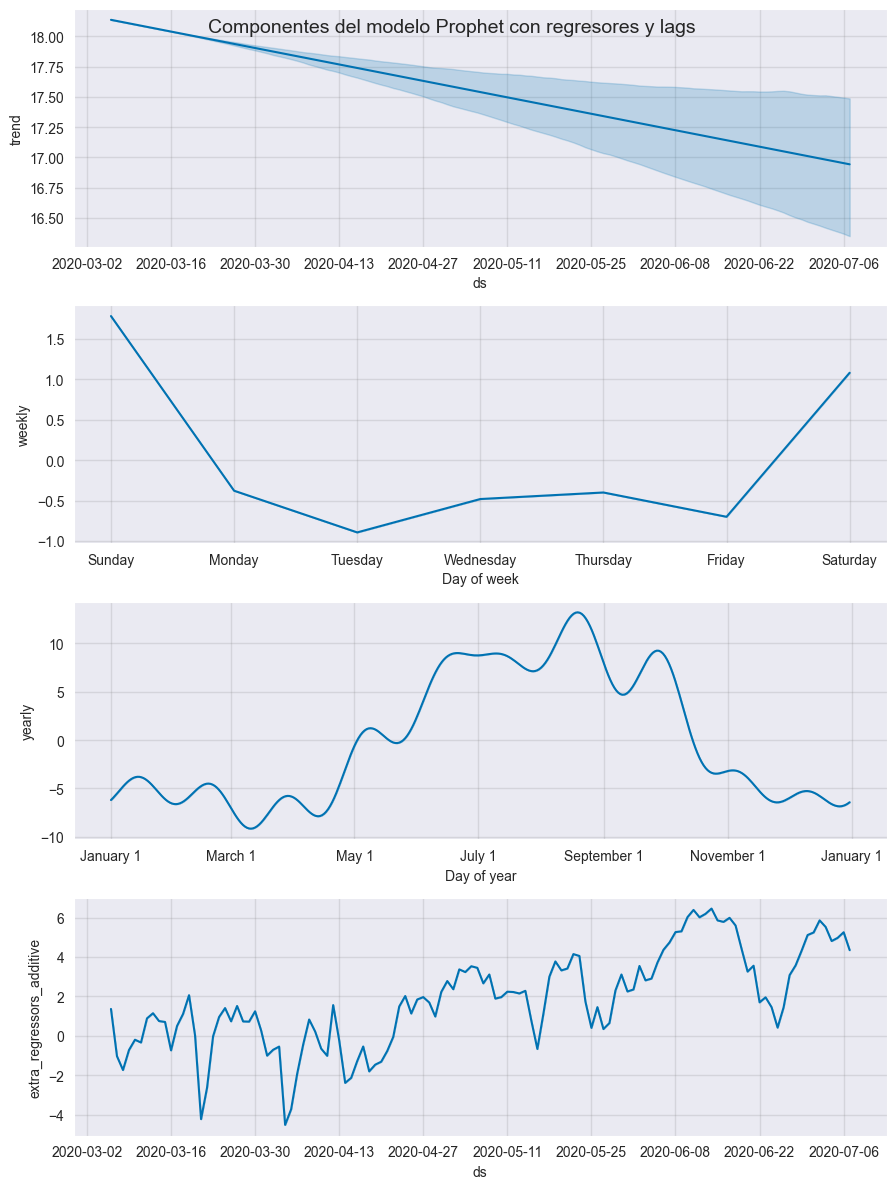

In [276]:
# Componentes del modelo Prophet con regresores y lags
fig_components = model_lags.plot_components(forecast_lags)
fig_components.suptitle('Componentes del modelo Prophet con regresores y lags', fontsize=14)
plt.show()

In [277]:
# 6. Calcular el MAE en el conjunto de prueba y entrenamiento

mae_train = mean_absolute_error(energy_train['y'], model_lags.predict(energy_train)['yhat'])
mae_test = mean_absolute_error(energy_test['y'], forecast_lags['yhat'])

print(f'MAE en el conjunto de prueba: {mae_test:.2f}%')
print(f'MAE en el conjunto de entrenamiento: {mae_train:.2f}%')

MAE en el conjunto de prueba: 4.61%
MAE en el conjunto de entrenamiento: 4.70%


MAE en el conjunto de prueba: 4.53%
MAE en el conjunto de entrenamiento: 4.71%

> En el conjunto de entrenamiento tiene un MAE identico al del modelo solo con regresores. Respecto, a la generalizacion en el conjunto de prueba el MAE empeora, lo que indica que el modelo no generaliza tan bien al agregarle los lags.

In [280]:
df

ds       y       date  Temp_avg  Hum_avg  Hum_min  Hum_max  \
5   2016-06-06  29.323 2016-06-06      76.6     84.0       53      100   
6   2016-06-07  30.322 2016-06-07      79.6     75.2       51      100   
7   2016-06-08  40.051 2016-06-08      79.3     73.3       46       96   
8   2016-06-09  38.667 2016-06-09      79.2     75.3       49      100   
9   2016-06-10  42.467 2016-06-10      80.6     80.0       55      100   
..         ...     ...        ...       ...      ...      ...      ...   
124 2020-07-03  39.659 2020-07-03      84.7     69.6       38       91   
125 2020-07-04  38.071 2020-07-04      84.6     70.5       43       94   
126 2020-07-05  36.565 2020-07-05      85.4     69.0       44       88   
127 2020-07-06  39.900 2020-07-06      85.5     71.9       59       82   
128 2020-07-07  38.483 2020-07-07      84.5     76.6       53       91   

     Press_avg  Press_min  Temp_avg_lag1  ...  Hum_avg_lag1  Hum_avg_lag2  \
5         29.7       29.6      70.884897  ...     74.694062     74.694062   
6         29.8       29.7      76.600000  ...     84.000000     74.694062   
7         29.8       29.8      79.600000  ...     75.200000     84.000000   
8         29.8       29.8      79.300000  ...     73.300000     75.200000   
9         29.8       29.8      79.200000  ...     75.300000     73.300000   
..         ...        ...            ...  ...           ...           ...   
124       29.9       29.8      88.000000  ...     66.200000     71.000000   
125       29.8       29.7      84.700000  ...     69.600000     66.200000   
126       29.7       29.7      84.600000  ...     70.500000     69.600000   
127       29.8       29.7      85.400000  ...     69.000000     70.500000   
128       29.8       29.8      85.500000  ...     71.900000     69.000000   

     Hum_avg_lag3  Hum_avg_lag4  Hum_avg_lag5  Press_avg_lag1  Press_avg_lag2  \
5       74.694062     74.694062     74.694062       29.911437       29.911437   
6       74.694062     74.694062     74.694062       29.700000       29.911437   
7       74.694062     74.694062     74.694062       29.800000       29.700000   
8       84.000000     74.694062     74.694062       29.800000       29.800000   
9       75.200000     84.000000     74.694062       29.800000       29.800000   
..            ...           ...           ...             ...             ...   
124     70.200000     72.200000     74.000000       29.800000       29.800000   
125     71.000000     70.200000     72.200000       29.900000       29.800000   
126     66.200000     71.000000     70.200000       29.800000       29.900000   
127     69.600000     66.200000     71.000000       29.700000       29.800000   
128     70.500000     69.600000     66.200000       29.800000       29.700000   

     Press_avg_lag3  Press_avg_lag4  Press_avg_lag5  
5         29.911437       29.911437       29.911437  
6         29.911437       29.911437       29.911437  
7         29.911437       29.911437       29.911437  
8         29.700000       29.911437       29.911437  
9         29.800000       29.700000       29.911437  
..              ...             ...             ...  
124       29.800000       29.800000       29.800000  
125       29.800000       29.800000       29.800000  
126       29.800000       29.800000       29.800000  
127       29.900000       29.800000       29.800000  
128       29.800000       29.900000       29.800000  

[1488 rows x 24 columns]

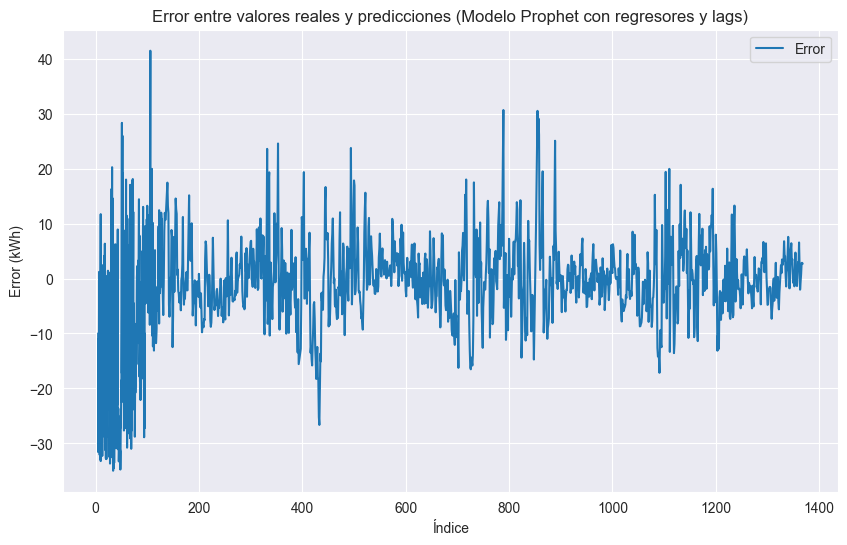

In [279]:
# 7. Graficar el error

df = pd.concat([energy_train, energy_test])
error_prophet_con_regresores_lags = df['y'] - model_lags.predict(df)['yhat']

# Graficar el error
plt.figure(figsize=(10, 6))
plt.plot(error_prophet_con_regresores_lags, label="Error")
plt.title("Error entre valores reales y predicciones (Modelo Prophet con regresores y lags)")
plt.xlabel("Índice")
plt.ylabel("Error (kWh)")
plt.legend()
plt.show()

> A diferencia del modelo solo con regresores esta vez se observa un error mucho mas grande al inicio de la serie de tiempo, probablemente por los valores nulos inputados en los lags. Luego, se observa un error mucho mas normalizado en comparacion con el modelo Prophet solo con regresores, mas hacia el final, en las predicciones en el conjunto de prueba, es decir, un error mucho menos variable.

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [312]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid):
    '''
    Función que recibe como entrada:
    -df: data entrenamiento.
    -df_to_pred: data a predecir (test).
    -features: lista de variables exógenas.
    -param_grid: grilla de hiperparámetros.
  
    Retorna:
    -tuning_results: Dataframe con resultados de la optimización.
    -best_params: Diccionario de mejores parámetros encontrados.
    '''

    # Generate all combinations of parameters
    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    MAEs = []  # Store the MAEs for each params here

    # Use tqdm to add a progress bar to the parameter tuning loop
    for params in tqdm(all_params, desc="Tuning Prophet parameters"):
        m = Prophet(**params)  # Fit model with given params
        for feature in features:
            m.add_regressor(feature)
        m.fit(df)

        # Prepare future dataframe
        df_prop = m.make_future_dataframe(periods=len(df_to_pred))
        df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
        df_prop[features] = df_feat[features]

        # Make predictions
        forecast = m.predict(df_prop)
        forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)
        forecast_pred_filtered = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)
        df_to_pred_filtered = df_to_pred[df_to_pred['ds'].isin(forecast_pred_filtered['ds'])].reset_index(drop=True)


        # Calculate MAE for the predictions
        mae_pred = mean_absolute_error(df_to_pred_filtered['y'], forecast_pred_filtered['yhat'])
        MAEs.append(mae_pred)

    # Find the best parameters
    tuning_results = pd.DataFrame(all_params)
    tuning_results['MAEs'] = MAEs
    tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
    best_params = all_params[np.argmin(MAEs)]
    return tuning_results, best_params

**Respuesta:**

In [309]:
energy_train = energy_train[['ds','y','Temp_avg', 'Temp_avg_lag1', 'Temp_avg_lag2', 'Temp_avg_lag3', 'Temp_avg_lag4', 'Temp_avg_lag5',
                                         'Hum_avg', 'Hum_avg_lag1', 'Hum_avg_lag2', 'Hum_avg_lag3', 'Hum_avg_lag4', 'Hum_avg_lag5',
                                         'Press_avg', 'Press_avg_lag1', 'Press_avg_lag2', 'Press_avg_lag3', 'Press_avg_lag4', 'Press_avg_lag5']]

energy_test = energy_test[['ds','y','Temp_avg', 'Temp_avg_lag1', 'Temp_avg_lag2', 'Temp_avg_lag3', 'Temp_avg_lag4', 'Temp_avg_lag5',
                                            'Hum_avg', 'Hum_avg_lag1', 'Hum_avg_lag2', 'Hum_avg_lag3', 'Hum_avg_lag4', 'Hum_avg_lag5',
                                            'Press_avg', 'Press_avg_lag1', 'Press_avg_lag2', 'Press_avg_lag3', 'Press_avg_lag4', 'Press_avg_lag5']]

In [313]:
# 1. Crear una grilla de hiperparámetros para optimizar el modelo Prophet

param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.8, 0.9, 1.0]
}

features = ['Temp_avg', 'Temp_avg_lag1', 'Temp_avg_lag2', 'Temp_avg_lag3', 'Temp_avg_lag4', 'Temp_avg_lag5',
                                         'Hum_avg', 'Hum_avg_lag1', 'Hum_avg_lag2', 'Hum_avg_lag3', 'Hum_avg_lag4', 'Hum_avg_lag5',
                                         'Press_avg', 'Press_avg_lag1', 'Press_avg_lag2', 'Press_avg_lag3', 'Press_avg_lag4', 'Press_avg_lag5']

# Optimizar los hiperparámetros

tuning_results, best_params = optimize_prophet(energy_train, energy_test, features, param_grid)

Tuning Prophet parameters: 100%|██████████| 54/54 [01:38<00:00,  1.82s/it]


In [314]:
# 2. Crear y entrenar un modelo Prophet con los mejores parámetros encontrados

model_optimized = Prophet(**best_params)
for feature in features:
    model_optimized.add_regressor(feature)
    
model_optimized.fit(energy_train)

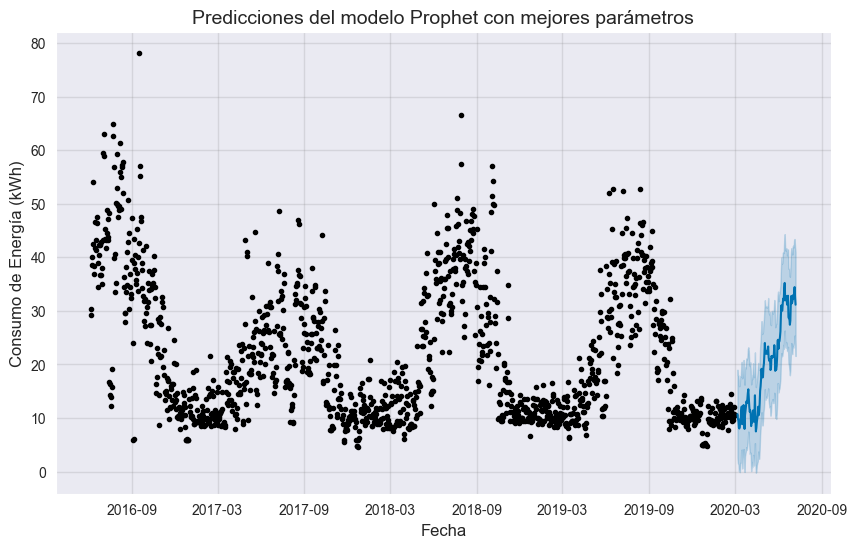

In [315]:
# 3. Graficar las predicciones y las componentes del modelo Prophet con los mejores parámetros

# Generar las predicciones para el conjunto de prueba
forecast_optimized = model_optimized.predict(energy_test)

# Graficar las predicciones y las componentes del modelo Prophet con los mejores parámetros
fig, ax = plt.subplots(figsize=(10, 6))
model_optimized.plot(forecast_optimized, ax=ax)
ax.set_title('Predicciones del modelo Prophet con mejores parámetros', fontsize=14)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Consumo de Energía (kWh)', fontsize=12)
plt.show()

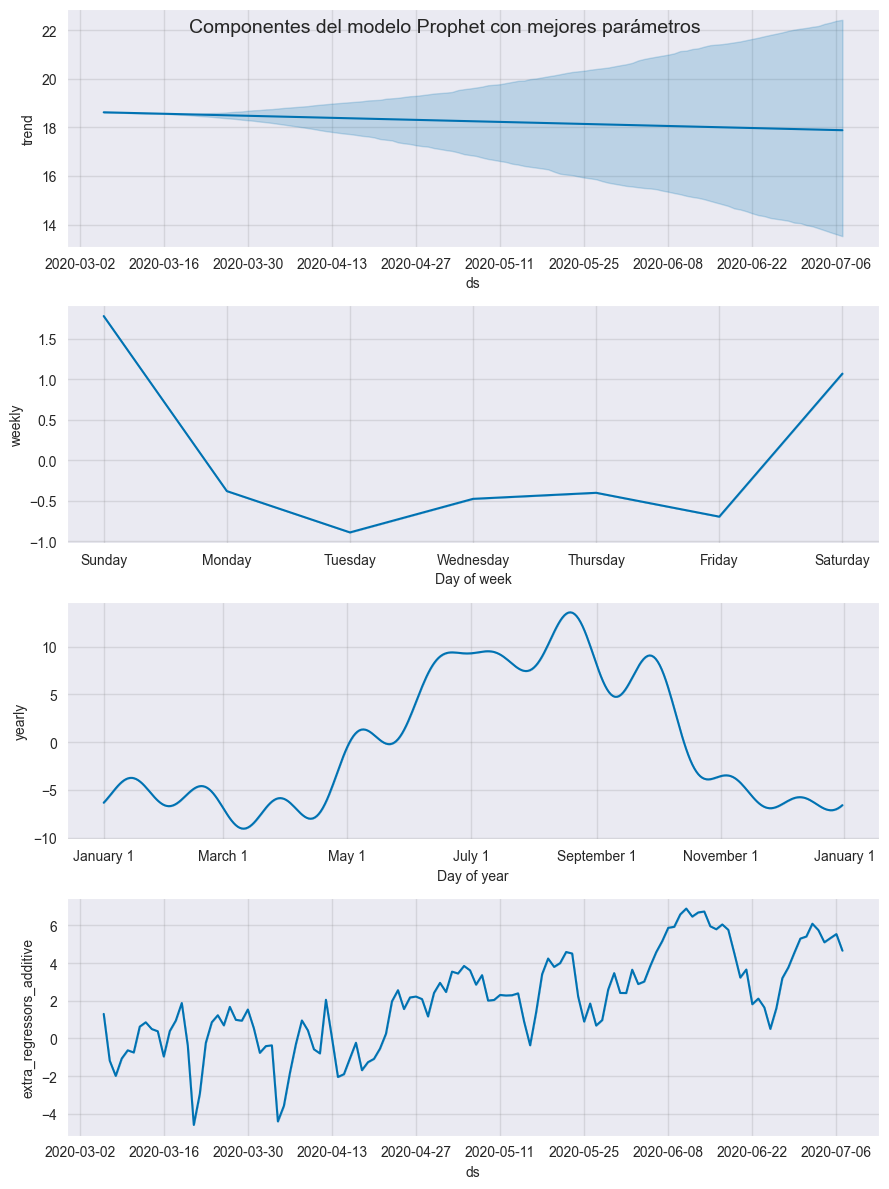

In [316]:
# Componentes del modelo Prophet con los mejores parámetros

fig_components = model_optimized.plot_components(forecast_optimized)
fig_components.suptitle('Componentes del modelo Prophet con mejores parámetros', fontsize=14)
plt.show()

In [317]:
# 4. Calcular el MAE en el conjunto de prueba y entrenamiento

mae_train = mean_absolute_error(energy_train['y'], model_optimized.predict(energy_train)['yhat'])
mae_test = mean_absolute_error(energy_test['y'], forecast_optimized['yhat'])

print(f'MAE en el conjunto de prueba: {mae_test:.2f}%')
print(f'MAE en el conjunto de entrenamiento: {mae_train:.2f}%')

MAE en el conjunto de prueba: 4.32%
MAE en el conjunto de entrenamiento: 4.55%


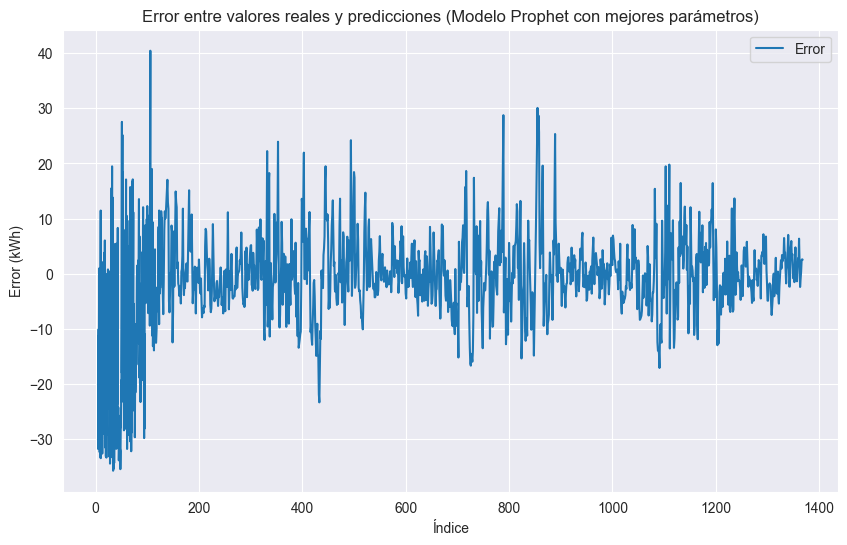

In [319]:
# 5. Graficar el error

df = pd.concat([energy_train, energy_test])
error_prophet_optimized = df['y'] - model_optimized.predict(df)['yhat']

# Graficar el error
plt.figure(figsize=(10, 6))
plt.plot(error_prophet_optimized, label="Error")
plt.title("Error entre valores reales y predicciones (Modelo Prophet con mejores parámetros)")
plt.xlabel("Índice")
plt.ylabel("Error (kWh)")
plt.legend()
plt.show()

> Se obtiene un mejor MAE tanto para el conjunto de entrenamiento como para el de testeo. Luego, al analizar la curva del error, se obtiene un comportamiento muy similar al modelo no optimizado, sobre todo en un inicio de la serie de tiempo tenemos bastante error.

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [3]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [4]:
beers_df = pd.read_csv('cervezas.csv')
beers_df.head()

userId  beerId  rating                            beerName  \
0     144     995     3.0                            Mai Bock   
1      63   58695     4.0  Hop In The Dark Cascadian Dark Ale   
2     147    4083     5.0                 Stone Ruination IPA   
3    4261   40310     3.0                     Noël Des Géants   
4     140    1904     5.0       Sierra Nevada Celebration Ale   

                        beerStyle  
0           Maibock / Helles Bock  
1              American Black Ale  
2  American Double / Imperial IPA  
3            Herbed / Spiced Beer  
4                    American IPA

## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

In [5]:
beers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295059 entries, 0 to 295058
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     295059 non-null  int64  
 1   beerId     295059 non-null  int64  
 2   rating     295059 non-null  float64
 3   beerName   295059 non-null  object 
 4   beerStyle  295059 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.3+ MB


Numero de usuarios: 706
Numero de cervezas: 3747
Tipo de calificaciones: [3.  4.  5.  3.5 2.  4.5 2.5 1.  1.5]
Numero de calificaciones: 295059
Numero de calificaciones nulas: 0
Media de las calificaciones: 3.86


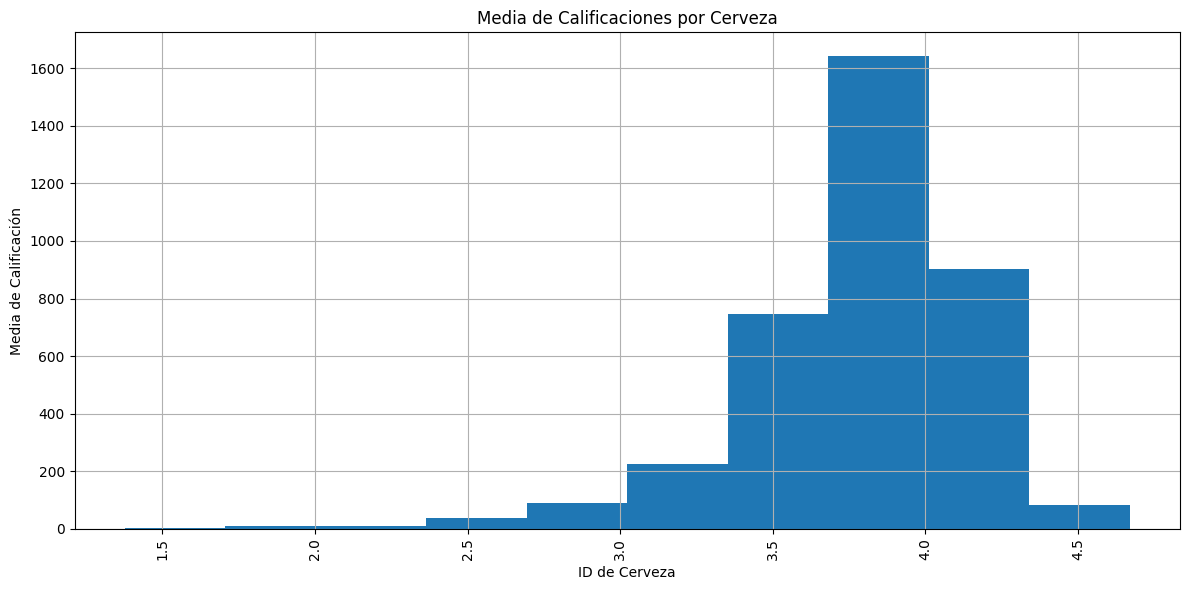

In [8]:
# Cantidad de usuarios
print(f'Numero de usuarios: {beers_df.userId.nunique()}')

# Cantidad de productos
print(f'Numero de cervezas: {beers_df.beerId.nunique()}')

# Tipo de calificaciones
print(f'Tipo de calificaciones: {beers_df.rating.unique()}')

# Cantidad de calificaciones  y calificaciones nulas
print(f'Numero de calificaciones: {beers_df.rating.count()}')
print(f'Numero de calificaciones nulas: {beers_df.rating.isnull().sum()}')

# Media de las calificaciones
print(f'Media de las calificaciones: {beers_df.rating.mean():.2f}')

media_por_producto = beers_df.groupby('beerId')['rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
media_por_producto.rating.hist()
plt.title('Media de Calificaciones por Cerveza')
plt.xlabel('ID de Cerveza')
plt.ylabel('Media de Calificación')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajustar el diseño
plt.show()

> Se observa la distribucion de la media de los rating por cerveza, donde la mayoria de las cervezas tienen una media de rating cercana a 4.

In [25]:
beers_df[(beers_df['userId'] == 3) & (beers_df['beerId'] == 5)]

userId  beerId  rating beerName     beerStyle
353          3       5     1.0    Amber  Vienna Lager
3888         3       5     4.0    Amber  Vienna Lager
8831         3       5     3.0    Amber  Vienna Lager
11177        3       5     3.0    Amber  Vienna Lager
14428        3       5     4.5    Amber  Vienna Lager
...        ...     ...     ...      ...           ...
266403       3       5     3.0    Amber  Vienna Lager
276648       3       5     3.5    Amber  Vienna Lager
278501       3       5     2.5    Amber  Vienna Lager
280767       3       5     2.5    Amber  Vienna Lager
287680       3       5     4.0    Amber  Vienna Lager

[100 rows x 5 columns]

> Notar que un usuario puede calificar muchas veces la misma cerveza.

In [208]:
# Matriz usuario producto
user_product_matrix = beers_df.pivot_table(index='userId', columns='beerId', values='rating')

display(user_product_matrix)

beerId  5         6         7         9         10        11        14     \
userId                                                                      
1         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       3.395  3.765217  3.256849  3.478261       NaN       NaN       NaN   
4         NaN       NaN       NaN       NaN  3.791908       NaN       NaN   
5         NaN       NaN       NaN       NaN       NaN  3.431818       NaN   
6         NaN       NaN       NaN       NaN       NaN       NaN  3.892157   
...       ...       ...       ...       ...       ...       ...       ...   
24903     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
25317     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
25923     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
27039     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
27681     NaN       NaN       NaN       NaN       NaN       NaN       NaN   

beerId  15     17     19     ...  74491  74530  74548  74579  74634  74827  \
userId                       ...                                             
1         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
3         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
4         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
5         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
6         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
...       ...    ...    ...  ...    ...    ...    ...    ...    ...    ...   
24903     NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
25317     NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
25923     NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
27039     NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
27681     NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   

beerId  74904  74986  75013  75086  
userId                              
1         NaN    NaN    NaN    NaN  
3         NaN    NaN    NaN    NaN  
4         NaN    NaN    NaN    NaN  
5         NaN    NaN    NaN    NaN  
6         NaN    NaN    NaN    NaN  
...       ...    ...    ...    ...  
24903     NaN    NaN    NaN    NaN  
25317     NaN    NaN    NaN    NaN  
25923     NaN    NaN    NaN    NaN  
27039     NaN    NaN    NaN    NaN  
27681     NaN    NaN    NaN    NaN  

[706 rows x 3747 columns]

>Por defecto pivot toma el promedio de las calificaciones.

## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero esta buscando nuevas cervezas para su consumo personal, donde usted pudo notar que Homero esta identificado como `userId = 100` en el dataset. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Homero (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [28]:
# 1.
# Seleccionar las columnas que representan las características de las cervezas
beer_features_df = beers_df[['beerId', 'beerName', 'beerStyle']]

# Eliminar duplicados
beer_features_df = beer_features_df.drop_duplicates()

display(beer_features_df)

beerId                                   beerName  \
0         995                                   Mai Bock   
1       58695         Hop In The Dark Cascadian Dark Ale   
2        4083                        Stone Ruination IPA   
3       40310                            Noël Des Géants   
4        1904              Sierra Nevada Celebration Ale   
...       ...                                        ...   
56171   47589                                        Red   
58257   62792                             Splinter Black   
60806   18432                            Wittekerke Rosé   
62517    4753  Hambleton Nightmare (Extra Stout  Porter)   
93817    6428                            Red Trolley Ale   

                              beerStyle  
0                 Maibock / Helles Bock  
1                    American Black Ale  
2        American Double / Imperial IPA  
3                  Herbed / Spiced Beer  
4                          American IPA  
...                                 ...  
56171          American Amber / Red Ale  
58257  American Double / Imperial Stout  
60806            Fruit / Vegetable Beer  
62517                    English Porter  
93817                     Irish Red Ale  

[3747 rows x 3 columns]

In [60]:
# 2.
from sklearn.feature_extraction.text import CountVectorizer
 
# Seleccionamos la columna 'beerStyle' del DataFrame sin duplicados
beer_styles = beer_features_df['beerStyle']

# Definimos el vectorizador, aplicamos minúsculas, eliminamos stopwords y filtramos términos
vectorizer = CountVectorizer(lowercase=True, stop_words='english', min_df=10)

# Aplicamos el método fit_transform sobre la columna 'beerStyle'
X = vectorizer.fit_transform(beer_styles)

# Convertimos el resultado a un DataFrame, con nombres de las palabras como columnas
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=beer_features_df['beerId'].drop_duplicates())

# Mostramos el DataFrame resultante
display(bow_df)

adjunct  ale  altbier  amber  american  apa  baltic  barleywine  beer  \
beerId                                                                          
995           0    0        0      0         0    0       0           0     0   
58695         0    1        0      0         1    0       0           0     0   
4083          0    0        0      0         1    0       0           0     0   
40310         0    0        0      0         0    0       0           0     1   
1904          0    0        0      0         1    0       0           0     0   
...         ...  ...      ...    ...       ...  ...     ...         ...   ...   
47589         0    1        0      1         1    0       0           0     0   
62792         0    0        0      0         1    0       0           0     0   
18432         0    0        0      0         0    0       0           0     1   
4753          0    0        0      0         0    0       0           0     0   
6428          0    1        0      0         0    0       0           0     0   

        belgian  ...  vienna  warmer  wee  weizenbock  wheat  wheatwine  wild  \
beerId           ...                                                            
995           0  ...       0       0    0           0      0          0     0   
58695         0  ...       0       0    0           0      0          0     0   
4083          0  ...       0       0    0           0      0          0     0   
40310         0  ...       0       0    0           0      0          0     0   
1904          0  ...       0       0    0           0      0          0     0   
...         ...  ...     ...     ...  ...         ...    ...        ...   ...   
47589         0  ...       0       0    0           0      0          0     0   
62792         0  ...       0       0    0           0      0          0     0   
18432         0  ...       0       0    0           0      0          0     0   
4753          0  ...       0       0    0           0      0          0     0   
6428          0  ...       0       0    0           0      0          0     0   

        winter  witbier  zwickel  
beerId                            
995          0        0        0  
58695        0        0        0  
4083         0        0        0  
40310        0        0        0  
1904         0        0        0  
...        ...      ...      ...  
47589        0        0        0  
62792        0        0        0  
18432        0        0        0  
4753         0        0        0  
6428         0        0        0  

[3747 rows x 95 columns]

In [114]:
# 3.
from sklearn.metrics.pairwise import cosine_similarity

def print_similar_beers(beer_name, beer_features_df, bow_df):
    # Asegurarse de que el nombre de la cerveza existe en el DataFrame
    if beer_name not in beer_features_df['beerName'].values:
        print(f"La cerveza '{beer_name}' no se encuentra en el DataFrame.")
        return
    
    # Obtener el índice de la cerveza usando el nombre
    beer_id = beer_features_df[beer_features_df['beerName'] == beer_name]['beerId'].values[0]
    beer_index = bow_df.index.get_loc(beer_id)
    

    # Calcular la similitud del coseno entre todas las cervezas
    cosine_sim = cosine_similarity(bow_df)

    # Obtener las similitudes para la cerveza dada
    sim_scores = list(enumerate(cosine_sim[beer_index]))

    # Ordenar las cervezas por similitud (excluyendo la cerveza misma)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtener las top 5 cervezas similares (excluyendo la cerveza misma)
    top_similar_indices = [i[0] for i in sim_scores[1:6]]  # Excluye el índice 0 (la misma cerveza)

    # Imprimir las cervezas similares
    print(f"\nTop 5 cervezas similares a '{beer_name}':")
    for index in top_similar_indices:
        print(f"Cerveza: {beer_features_df['beerName'].iloc[index]} (Similitud: {sim_scores[top_similar_indices.index(index) + 1][1]:.4f})")


print_similar_beers('Chocolate Porter', beer_features_df, bow_df)


Top 5 cervezas similares a 'Chocolate Porter':
Cerveza: Great Lakes Edmund Fitzgerald Porter (Similitud: 1.0000)
Cerveza: Perseus Porter (Similitud: 1.0000)
Cerveza: Southampton Imperial Porter (Similitud: 1.0000)
Cerveza: Kona Coffee Macadamia Coconut Porter (Similitud: 1.0000)
Cerveza: Black Marlin Porter (Similitud: 1.0000)


In [102]:
user_product_matrix

beerId  5         6         7         9         10        11        14     \
userId                                                                      
1       0.000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3       3.395  3.765217  3.256849  3.478261  0.000000  0.000000  0.000000   
4       0.000  0.000000  0.000000  0.000000  3.791908  0.000000  0.000000   
5       0.000  0.000000  0.000000  0.000000  0.000000  3.431818  0.000000   
6       0.000  0.000000  0.000000  0.000000  0.000000  0.000000  3.892157   
...       ...       ...       ...       ...       ...       ...       ...   
24903   0.000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25317   0.000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25923   0.000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
27039   0.000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
27681   0.000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

beerId  15     17     19     ...  74491  74530  74548  74579  74634  74827  \
userId                       ...                                             
1         0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
3         0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
4         0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
5         0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
6         0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
...       ...    ...    ...  ...    ...    ...    ...    ...    ...    ...   
24903     0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
25317     0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
25923     0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
27039     0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
27681     0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   

beerId  74904  74986  75013  75086  
userId                              
1         0.0    0.0    0.0    0.0  
3         0.0    0.0    0.0    0.0  
4         0.0    0.0    0.0    0.0  
5         0.0    0.0    0.0    0.0  
6         0.0    0.0    0.0    0.0  
...       ...    ...    ...    ...  
24903     0.0    0.0    0.0    0.0  
25317     0.0    0.0    0.0    0.0  
25923     0.0    0.0    0.0    0.0  
27039     0.0    0.0    0.0    0.0  
27681     0.0    0.0    0.0    0.0  

[706 rows x 3747 columns]

In [133]:
# Homero mejor cerveza evaluada en promedio

best_rating = user_product_matrix.loc[100].max()
best_beer_index = user_product_matrix.loc[100].idxmax()

best_beer = beers_df[beers_df['beerId'] == 325]
print(f'Mejor calificacion en promedio: {best_rating}:.2f')
print(f'Id de la mejor evaluada: {best_beer_index}')
print(f'Cerveza mejor evaluada:\n')
display(best_beer.head(1))

Mejor calificacion en promedio: 3.9047619047619047:.2f
Id de la mejor evaluada: 325
Cerveza mejor evaluada:



userId  beerId  rating                       beerName  \
20832     100     325     4.5  McNeill's Firehouse Amber Ale   

                      beerStyle  
20832  American Amber / Red Ale

In [123]:
# 4.
def find_best_beer(user_ratings, user_id):
    """
    Encuentra la mejor cerveza evaluada por un usuario específico.
    
    Parameters:
    - user_ratings: DataFrame que representa la matriz usuario-producto.
    - user_id: ID del usuario para el cual se busca la mejor cerveza.
    
    Returns:
    - best_beer_name: Nombre de la mejor cerveza evaluada.
    - best_beer_rating: Calificación de la mejor cerveza evaluada.
    """
    # Filtrar las calificaciones del usuario especificado
    user_ratings_filtered = user_ratings.loc[user_id]
    
    # Encontrar la cerveza mejor evaluada
    best_beer_index = user_ratings_filtered.idxmax()  # Índice de la cerveza mejor evaluada
    best_beer_rating = user_ratings_filtered.max()     # Mejor calificación
    
    return best_beer_index, best_beer_rating

user_id = 100  # ID del usuario a buscar
best_beer_index, best_beer_rating = find_best_beer(user_product_matrix, user_id)
beer_name = beer_features_df[beer_features_df['beerId']==best_beer_index]['beerName'].values[0]
print(f"La mejor cerveza evaluada por el usuario {user_id} es: {beer_name} con una calificación de {best_beer_rating:.2f}.")

print_similar_beers(beer_name, beer_features_df, bow_df)

La mejor cerveza evaluada por el usuario 100 es: McNeill's Firehouse Amber Ale con una calificación de 3.90.

Top 5 cervezas similares a 'McNeill's Firehouse Amber Ale':
Cerveza: Grail Ale (Similitud: 1.0000)
Cerveza: Santa's Private Reserve Ale (Similitud: 1.0000)
Cerveza: Hemp Hop Rye Amber Ale (Similitud: 1.0000)
Cerveza: Autumn Fest (Similitud: 1.0000)
Cerveza: Red Rocket Ale (Similitud: 1.0000)


## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [148]:
# 1. 

reader = Reader(rating_scale=(1, 5))

# Crear el Dataset a partir del DataFrame
surprise_dataset = Dataset.load_from_df(beers_df[['userId', 'beerId', 'rating']], reader)

> El orden importa al transformar un DataFrame de pandas a un Dataset de surprise porque:
>
>- **Estructura Esperada**: surprise requiere que los datos estén en un formato específico: userId, itemId (o beerId), y rating, en ese orden.
>
>- **Interpretación Correcta**: Cambiar el orden puede llevar a confusión sobre qué representa cada columna, resultando en errores en los cálculos.
>
>- **Consistencia**: Mantener el orden ayuda a garantizar que las funciones y métodos operen correctamente sobre los datos.

In [155]:
# 2.
from surprise.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
trainset, testset = train_test_split(surprise_dataset, test_size=0.25, random_state=123)

# Mostrar la cantidad de datos en cada conjunto
print(f"Tamaño del conjunto de entrenamiento: {trainset.n_ratings}")
print(f"Tamaño del conjunto de prueba: {len(testset)}")

Tamaño del conjunto de entrenamiento: 221294
Tamaño del conjunto de prueba: 73765


In [159]:
# 3.

# Definir el modelo KNN basado en usuarios utilizando la similitud coseno
sim_options = {
    'name': 'cosine',
    'user_based': True  # True para KNN basado en usuarios
}
knn_model = KNNBasic(sim_options=sim_options)

# Entrenar el modelo
knn_model.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions = knn_model.test(testset)

# Imprimir las primeras predicciones
for uid, iid, true_r, est, _ in predictions[:5]:
    print(f'Usuario: {uid}, Cerveza: {iid}, Valor real: {true_r}, Valor estimado: {est:.2f}')

Computing the cosine similarity matrix...
Done computing similarity matrix.
Usuario: 105, Cerveza: 580, Valor real: 2.0, Valor estimado: 3.61
Usuario: 57, Cerveza: 171, Valor real: 4.0, Valor estimado: 3.36
Usuario: 29, Cerveza: 43929, Valor real: 4.0, Valor estimado: 3.67
Usuario: 57, Cerveza: 1284, Valor real: 2.5, Valor estimado: 3.05
Usuario: 35, Cerveza: 14309, Valor real: 4.0, Valor estimado: 3.62


In [163]:
# 4.

from surprise import accuracy


mae = accuracy.mae(predictions)

# Convertir las predicciones a un DataFrame para análisis
predictions_df = pd.DataFrame(predictions, columns=['userId', 'beerId', 'true_rating', 'estimated_rating', 'details'])

# Mostrar el DataFrame con las predicciones
display(predictions_df.head())  

MAE:  0.4645


userId  beerId  true_rating  estimated_rating  \
0     105     580          2.0          3.612500   
1      57     171          4.0          3.362500   
2      29   43929          4.0          3.675000   
3      57    1284          2.5          3.045455   
4      35   14309          4.0          3.625000   

                                     details  
0  {'actual_k': 40, 'was_impossible': False}  
1  {'actual_k': 40, 'was_impossible': False}  
2  {'actual_k': 40, 'was_impossible': False}  
3  {'actual_k': 33, 'was_impossible': False}  
4  {'actual_k': 40, 'was_impossible': False}

In [165]:
# 5.
# Entrenar el modelo KNN basado en productos
knn_product_model = KNNBasic(sim_options={'name': 'cosine', 'user_based': False})
knn_product_model.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions = knn_product_model.test(testset)

# Calcular el MAE
mae_product = accuracy.mae(predictions)

# Convertir las predicciones a un DataFrame para análisis
predictions_df_product = pd.DataFrame(predictions, columns=['userId', 'beerId', 'true_rating', 'estimated_rating', 'details'])

# Seleccionar columnas relevantes
predictions_df_product = predictions_df_product[['userId', 'beerId', 'true_rating', 'estimated_rating']]

# Mostrar el DataFrame con las predicciones
display(predictions_df_product.head()) 

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.4640
MAE del modelo KNN basado en productos: 0.4639706480225699


userId  beerId  true_rating  estimated_rating
0     105     580          2.0          3.612500
1      57     171          4.0          3.362500
2      29   43929          4.0          3.675000
3      57    1284          2.5          3.157924
4      35   14309          4.0          3.625000

### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [170]:
# 1. Entrenar el modelo NMF
nmf_model = NMF(random_state=123)  # Asegurando la reproducibilidad con random_state
nmf_model.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions = nmf_model.test(testset)

# 2. Calcular el MAE
mae_nmf = accuracy.mae(predictions)

# Convertir las predicciones a un DataFrame para análisis
predictions_df_nmf = pd.DataFrame(predictions, columns=['userId', 'beerId', 'true_rating', 'estimated_rating', 'details'])

# Seleccionar columnas relevantes
predictions_df_nmf = predictions_df_nmf[['userId', 'beerId', 'true_rating', 'estimated_rating']]

# Mostrar el DataFrame con las predicciones
display(predictions_df_nmf.head())  

MAE:  0.4817
MAE del modelo NMF: 0.48168199797361483


userId  beerId  true_rating  estimated_rating
0     105     580          2.0          3.474258
1      57     171          4.0          3.415381
2      29   43929          4.0          3.755506
3      57    1284          2.5          3.169163
4      35   14309          4.0          3.362373

In [187]:
# 3. Entrenar el modelo SVD
svd_model = SVD(random_state=123)  # Asegurando la reproducibilidad con random_state
svd_model.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions_svd = svd_model.test(testset)

# 4. Calcular el MAE
mae_svd = accuracy.mae(predictions_svd)

# Convertir las predicciones a un DataFrame para análisis
predictions_df_svd = pd.DataFrame(predictions_svd, columns=['userId', 'beerId', 'true_rating', 'estimated_rating', 'details'])

# Seleccionar columnas relevantes
predictions_df_svd = predictions_df_svd[['userId', 'beerId', 'true_rating', 'estimated_rating']]

# Mostrar el DataFrame con las predicciones
display(predictions_df_svd.head()) 

MAE:  0.4613


userId  beerId  true_rating  estimated_rating
0     105     580          2.0          3.458597
1      57     171          4.0          3.248860
2      29   43929          4.0          3.696454
3      57    1284          2.5          3.074534
4      35   14309          4.0          3.588658

>El modelo SVD presenta un Error Absoluto Medio (MAE) de **0.4613**, que es más bajo que el MAE del modelo NMF, que es de **0.4817**. Esto indica que, en promedio, las predicciones del modelo SVD son más precisas y se acercan más a los valores reales. Al analizar las calificaciones estimadas, se observa que el modelo SVD ofrece estimaciones más cercanas a las calificaciones reales para varios usuarios y cervezas. Por ejemplo, para el usuario 105, la cerveza 580 tiene una calificación real de 2.0, y el modelo SVD estima 3.46, lo que, aunque sigue siendo un poco alto, se aproxima más a la realidad que el NMF, que estima 3.47. Este patrón se repite en otras cervezas, donde el modelo SVD tiende a proporcionar estimaciones que, aunque no son perfectas, son más ajustadas en comparación con el NMF. Por lo tanto, el modelo **SVD** es seleccionado como el mejor debido a su mayor precisión en las predicciones de calificaciones, lo que es crucial en sistemas de recomendación donde la exactitud influye directamente en la satisfacción del usuario. Además, SVD es conocido por su capacidad para capturar patrones latentes en grandes conjuntos de datos, lo que lo hace más eficaz en escenarios con muchas interacciones, como las calificaciones de cervezas. Aunque el NMF tiene ventajas en la interpretabilidad debido a su naturaleza no negativa, la mayor precisión del SVD en este caso lo convierte en la opción preferida para recomendaciones en este contexto específico.

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Homero (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Homero, para estimar las calificaciones que Homero podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [185]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [174]:
# 1.
def get_top_n(predictions_df, n=3):
    """
    Devuelve las N mejores cervezas recomendadas para cada usuario.

    Args:
    predictions_df_ dataframe con las estimaciones.
    n (int): Número de cervezas recomendadas a devolver para cada usuario.

    Returns:
    DataFrame: Un DataFrame que contiene las mejores N cervezas recomendadas para cada usuario.
    """   
    # drop duplicados
    df = predictions_df.drop_duplicates(subset=['userId', 'beerId'])
    
    # Obtener las mejores N cervezas recomendadas para cada usuario
    top_n = df.groupby('userId').apply(lambda x: x.nlargest(n, 'estimated_rating'))
    
    # Resetear el índice para facilitar el acceso
    top_n = top_n.reset_index(drop=True)
    
    return top_n

# Obtener las 3 mejores cervezas recomendadas para cada usuario
top_n_recommendations = get_top_n(predictions_df_svd, n=3)

# Filtrar para obtener las 3 mejores cervezas recomendadas para Homero (userId = 100)
homero_recommendations = top_n_recommendations[top_n_recommendations['userId'] == 100]

print("Recomendaciones para Homero:")
print(homero_recommendations)


Recomendaciones para Homero:
     userId  beerId  true_rating  estimated_rating
139     100     325          2.0          3.992848
140     100    1393          4.0          3.968820
141     100    1884          2.5          3.884717


In [182]:
# 2.
import random

# Identificar las cervezas no evaluadas por Homero
all_beers = set(ratings_df['beerId'])
homero_rated = set(ratings_df[ratings_df['userId'] == 100]['beerId'])
unrated_beers = list(all_beers - homero_rated)

# Seleccionar 5 cervezas aleatorias no evaluadas
random_unrated_beers = random.sample(unrated_beers, 5)

predictions = []
for beer_id in random_unrated_beers:
    predicted_rating = svd_model.predict(uid=100, iid=beer_id).est  # Cambié user_id a uid y item_id a iid
    predictions.append((100, beer_id, predicted_rating))

# Convertir a DataFrame para visualización
predictions_df = pd.DataFrame(predictions, columns=['userId', 'beerId', 'predicted_rating'])

print("Predicciones de rating para cervezas no evaluadas por Homero:")
display(predictions_df)

Predicciones de rating para cervezas no evaluadas por Homero:


userId  beerId  predicted_rating
0     100    2972          3.862545
1     100    2445          3.862545
2     100    2056          3.862545
3     100    1124          3.862545
4     100    1915          3.862545

In [192]:
# 3. 
k = 10
threshold = 3.5

# Usar la función ya definida para obtener precisión y recall
precisions, recalls = precision_recall_at_k(predictions_svd, k=k, threshold=threshold)

# Calcular promedios
average_precision = np.mean(list(precisions.values()))
average_recall = np.mean(list(recalls.values()))

# Mostrar resultados
print(f"Promedio de Precisión@{k}: {average_precision:.4f}")
print(f"Promedio de Recall@{k}: {average_recall:.4f}")

Promedio de Precisión@10: 0.7345
Promedio de Recall@10: 0.3697


In [194]:
# 4.
from collections import defaultdict

# Inicializar listas para almacenar resultados
k_values = range(3, 26)
precision_results = []
recall_results = []

# Calcular precisión y recall para cada k
for k in k_values:
    precisions, recalls = precision_recall_at_k(predictions_svd, k=k, threshold=3.5)
    
    # Calcular promedios
    average_precision = np.mean(list(precisions.values()))
    average_recall = np.mean(list(recalls.values()))
    
    precision_results.append(average_precision)
    recall_results.append(average_recall)

# Mostrar resultados
print("k\tPrecisión\tRecall")
for k, prec, rec in zip(k_values, precision_results, recall_results):
    print(f"{k}\t{prec:.4f}\t{rec:.4f}")

k	Precisión	Recall
3	0.7316	0.1554
4	0.7291	0.1993
5	0.7310	0.2406
6	0.7318	0.2739
7	0.7327	0.3034
8	0.7330	0.3296
9	0.7333	0.3506
10	0.7345	0.3697
11	0.7351	0.3858
12	0.7327	0.4000
13	0.7328	0.4140
14	0.7328	0.4263
15	0.7325	0.4378
16	0.7319	0.4476
17	0.7309	0.4569
18	0.7314	0.4664
19	0.7306	0.4749
20	0.7305	0.4828
21	0.7300	0.4904
22	0.7298	0.4975
23	0.7296	0.5042
24	0.7294	0.5105
25	0.7294	0.5166


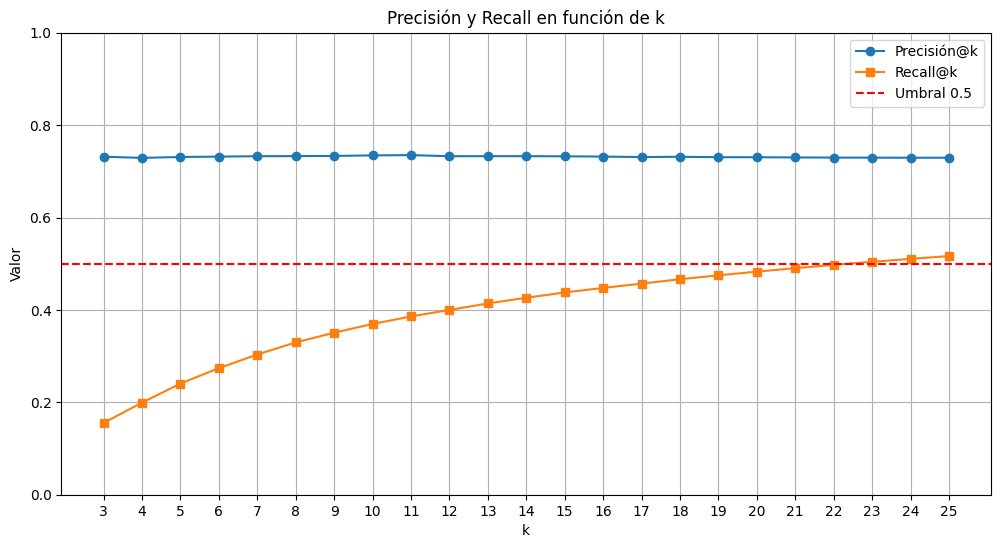

In [195]:
# Graficar precisión y recall
plt.figure(figsize=(12, 6))
plt.plot(k_values, precision_results, label='Precisión@k', marker='o')
plt.plot(k_values, recall_results, label='Recall@k', marker='s')
plt.title('Precisión y Recall en función de k')
plt.xlabel('k')
plt.ylabel('Valor')
plt.xticks(k_values)
plt.ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='Umbral 0.5')  # Umbral de referencia
plt.legend()
plt.grid()
plt.show()

>Los resultados de precisión y recall obtenidos para diferentes valores de \( k \) muestran tendencias interesantes en el rendimiento del modelo de recomendaciones. La precisión se mantiene relativamente constante, oscilando entre el 73% y el 73.5%, lo que indica que, al agregar más recomendaciones, la calidad de las cervezas sugeridas se mantiene alta. En contraste, el recall presenta una tendencia creciente, comenzando desde un 15.54% en \( k = 3 \) y alcanzando un 51.66% en \( k = 25 \). Esto sugiere que a medida que aumentamos \( k \), el modelo tiene más probabilidades de incluir cervezas relevantes, aunque la relevancia no es tan alta en comparación con las recomendadas. A pesar de que la precisión es satisfactoria, el recall bajo indica que el modelo no está capturando todas las cervezas relevantes disponibles, lo que representa oportunidades perdidas para recomendaciones que podrían interesar a los usuarios. En general, un buen modelo de recomendaciones debe equilibrar precisión y recall. Aunque el modelo actual tiene un desempeño aceptable, se sugiere realizar ajustes adicionales para mejorar el recall y, en consecuencia, la efectividad del sistema. Explorar diferentes algoritmos o realizar un ajuste más fino en la función de similitud utilizada podría contribuir a mejorar la satisfacción del usuario.
>
>Por último, aunque la precisión es alta, el bajo recall indica que hay espacio para optimizar las recomendaciones y asegurar que se atiendan mejor las preferencias de los usuarios.

In [203]:
thresholds = np.arange(3.0, 4.6, 0.1)
precisions = []
recalls = []

# Calcular precisión y recall para cada threshold
for threshold in thresholds:
    precision, recall = precision_recall_at_k(predictions_svd, k=10, threshold=threshold)
    # Calcular promedios
    avg_precision = np.mean(list(precision.values()))
    avg_recall = np.mean(list(recall.values()))
    precisions.append(avg_precision)
    recalls.append(avg_recall)

# Mostrar resultados
print("Threshold\tPrecisión\tRecall")
for threshold, prec, rec in zip(thresholds, precisions, recalls):
    print(f"{threshold:.2}\t{prec:.4f}\t{rec:.4f}")

Threshold	Precisión	Recall
3.0	0.8940	0.4500
3.1	0.7937	0.4390
3.2	0.7809	0.4220
3.3	0.7703	0.4058
3.4	0.7557	0.3899
3.5	0.5887	0.3730
3.6	0.5674	0.3387
3.7	0.5407	0.2947
3.8	0.5028	0.2526
3.9	0.4361	0.1927
4.0	0.1973	0.1486
4.1	0.1514	0.0895
4.2	0.0966	0.0456
4.3	0.0485	0.0187
4.4	0.0326	0.0139
4.5	0.0088	0.0064


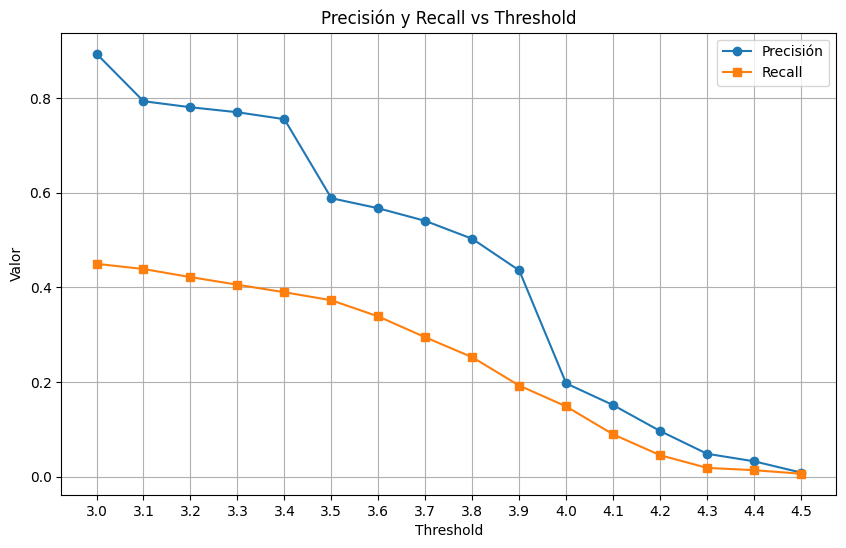

In [204]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precisión', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='s')
plt.title('Precisión y Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Valor')
plt.xticks(np.arange(3.0, 4.6, 0.1))
plt.grid()
plt.legend()
plt.show()

>Los resultados de precisión y recall calculados para valores de `threshold` que varían entre 3.0 y 4.5 muestran un patrón notable. A un `threshold` de 3.0, la precisión es bastante alta, alcanzando 0.8940, mientras que el recall es del 0.4500. Esto indica que, aunque muchas de las recomendaciones realizadas son relevantes, aún hay un porcentaje significativo de cervezas que podrían haber sido incluidas, pero no lo fueron.
>
>Conforme aumentamos el `threshold`, la precisión experimenta una disminución drástica, pasando a 0.1973 en 4.0, mientras que el recall también se reduce a 0.1486. Este fenómeno refleja cómo un umbral más alto hace que el modelo sea más exigente con las recomendaciones, priorizando la calidad sobre la cantidad. A medida que el `threshold` aumenta, el modelo se vuelve menos capaz de identificar cervezas relevantes, resultando en una menor cantidad de recomendaciones acertadas y, por ende, en una precisión más baja.
>
>A partir de un `threshold` de 3.5, la precisión cae abruptamente por debajo del 0.6, mientras que el recall sigue una tendencia similar, alcanzando solo un 0.3730 en ese umbral. A partir de 4.0, ambos valores se desploman considerablemente, lo que sugiere que el modelo no está siendo capaz de identificar recomendaciones válidas para cervezas que, aunque no cumplen con la calificación más alta, podrían ser atractivas para los usuarios.

In [216]:
%timeit
# 5. Identificar los ratings faltantes y estimar rating
missing_values = user_product_matrix.isnull()

# Predecir ratings para los pares faltantes
for userId in user_product_matrix.index:
    for beerId in user_product_matrix.columns:
        if missing_values.loc[userId, beerId]:  # Solo si el rating está faltante
            pred = svd_model.predict(userId, beerId)
            user_product_matrix.loc[userId, beerId] = pred.est  # Asignar el rating estimado

In [215]:
display(user_product_matrix)

beerId     5         6         7         9         10        11        14     \
userId                                                                         
1       3.738922  3.958930  3.509152  3.799403  3.692810  3.652972  3.913992   
3       3.395000  3.765217  3.256849  3.478261  3.511321  3.503509  3.701645   
4       3.834212  4.083182  3.694044  3.944193  3.791908  3.842130  4.030651   
5       3.578875  3.798533  3.543704  3.822955  3.627945  3.431818  3.733025   
6       3.623921  3.994348  3.609728  3.933090  3.716647  3.822101  3.892157   
...          ...       ...       ...       ...       ...       ...       ...   
24903   3.902189  3.934947  3.732682  3.867089  3.896440  3.722154  3.892321   
25317   3.561696  3.790360  3.463860  3.721043  3.662084  3.852254  3.770073   
25923   3.792671  4.116089  3.512436  3.887961  3.922141  4.053529  4.080157   
27039   3.858714  4.249514  3.657465  4.013291  3.834238  4.012595  4.209690   
27681   3.587597  3.760936  3.400717  3.618495  3.526441  3.590280  3.783155   

beerId     15        17        19     ...     74491     74530     74548  \
userId                                ...                                 
1       3.873090  3.790925  3.868429  ...  3.701045  4.106207  3.898317   
3       3.718000  3.516077  3.747514  ...  3.520801  3.939921  3.755660   
4       4.069698  3.851820  4.089999  ...  3.871200  4.306345  4.099109   
5       3.862562  3.631492  3.927325  ...  3.548072  4.069420  3.956121   
6       4.057995  3.704496  4.029072  ...  3.694151  4.194626  3.972953   
...          ...       ...       ...  ...       ...       ...       ...   
24903   3.924100  3.792576  4.169088  ...  3.919943  4.269315  4.057025   
25317   3.874430  3.570379  3.720108  ...  3.614153  4.022102  3.801360   
25923   3.947569  3.896837  3.955290  ...  3.952227  4.161739  4.046564   
27039   3.990611  3.979038  4.121612  ...  3.979622  4.317018  4.264699   
27681   3.676539  3.577476  3.869102  ...  3.698628  3.893916  3.781286   

beerId     74579     74634     74827     74904     74986     75013     75086  
userId                                                                        
1       3.955747  3.755560  4.051077  3.951039  4.197562  3.824383  3.630626  
3       3.801614  3.581058  3.808148  3.715410  4.000492  3.655420  3.497157  
4       4.177382  3.930523  4.188527  4.094088  4.335523  4.030833  3.856329  
5       3.968180  3.565551  4.029026  3.815305  4.079000  3.787848  3.701021  
6       4.108640  3.924600  4.269287  4.078629  4.241268  3.985316  3.873319  
...          ...       ...       ...       ...       ...       ...       ...  
24903   4.078301  3.884440  4.171126  3.938433  4.316369  4.076926  3.831273  
25317   4.018086  3.977021  3.686858  3.992004  4.178553  3.768082  3.759906  
25923   4.212260  3.937583  4.055821  4.202484  4.208554  3.870957  3.891462  
27039   4.340663  4.066626  4.251546  4.297755  4.504242  4.074636  3.949451  
27681   3.977590  3.676077  3.913245  3.765244  4.005823  3.677844  3.499304  

[706 rows x 3747 columns]

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por el foro de U-cursos o por correo.

<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
